# Results

In [1]:
import numpy as np
import pandas as pd
import neutron_stars as ns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.image as mpimg

In [2]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

In [3]:
plt.rc('font', size=25); plt.rc('axes', titlesize=25); plt.rc('axes', labelsize=25); plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)

In [4]:
def plot_true_vs_pred_coefficients(df, title, columns=['c1','c2']):
    fig, (ax1, ax2) = plt.subplots(1,2)
    for _, group in df.groupby(columns):
        if 'fold' in group.columns:
            group = group[group.fold == 1]
        ax1.scatter(group[columns[0]], group['pred_' + columns[0]]) #, color='cornflowerblue')
        ax2.scatter(group[columns[1]], group['pred_' + columns[1]]) #, color='cornflowerblue')

    ax1.set_xlim(4.7, 5.3); ax1.set_ylim(4.7, 5.3); ax1.set_xlabel('True'); ax1.set_ylabel('Predicted'); ax1.set_title(columns[0])
    ax2.set_xlim(-2.1, -1.8); ax2.set_ylim(-2.1, -1.8); ax2.set_xlabel('True'); ax2.set_ylabel('Predicted'); ax2.set_title(columns[1])
    plt.suptitle(title)
    
    
def get_data_loader(paradigm):
    args = {
        'scaler_type': 'none2none',
        'sherpa': True,
        'paradigm': paradigm,
        'batch_size': 1024,
        'num_coefficients': 2,
        'use_spectra_stats': False,
    }
    ns.paradigm_settings(args)
    args['num_folds'] = 1
    args['fold'] = 1
    return ns.data_loader.DataLoader(args)

# Spectra + Star -> Mass Radius
---
### HP Search Results

In [11]:
training_df = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2mr/results.csv')
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra+star2mr', num_files=500, metric_type='mape')
best_trial_id = int(hp_trial_erros.idxmin())
hp_trial_erros.sort_values(by='error').head(10)

100%|██████████| 451/451 [00:12<00:00, 36.54it/s]


error
267  6.986650
467  7.562974
384  7.669154
139  7.698923
43   7.725590
21   7.727783
177  7.736916
193  7.957862
315  7.990311
453  8.182440

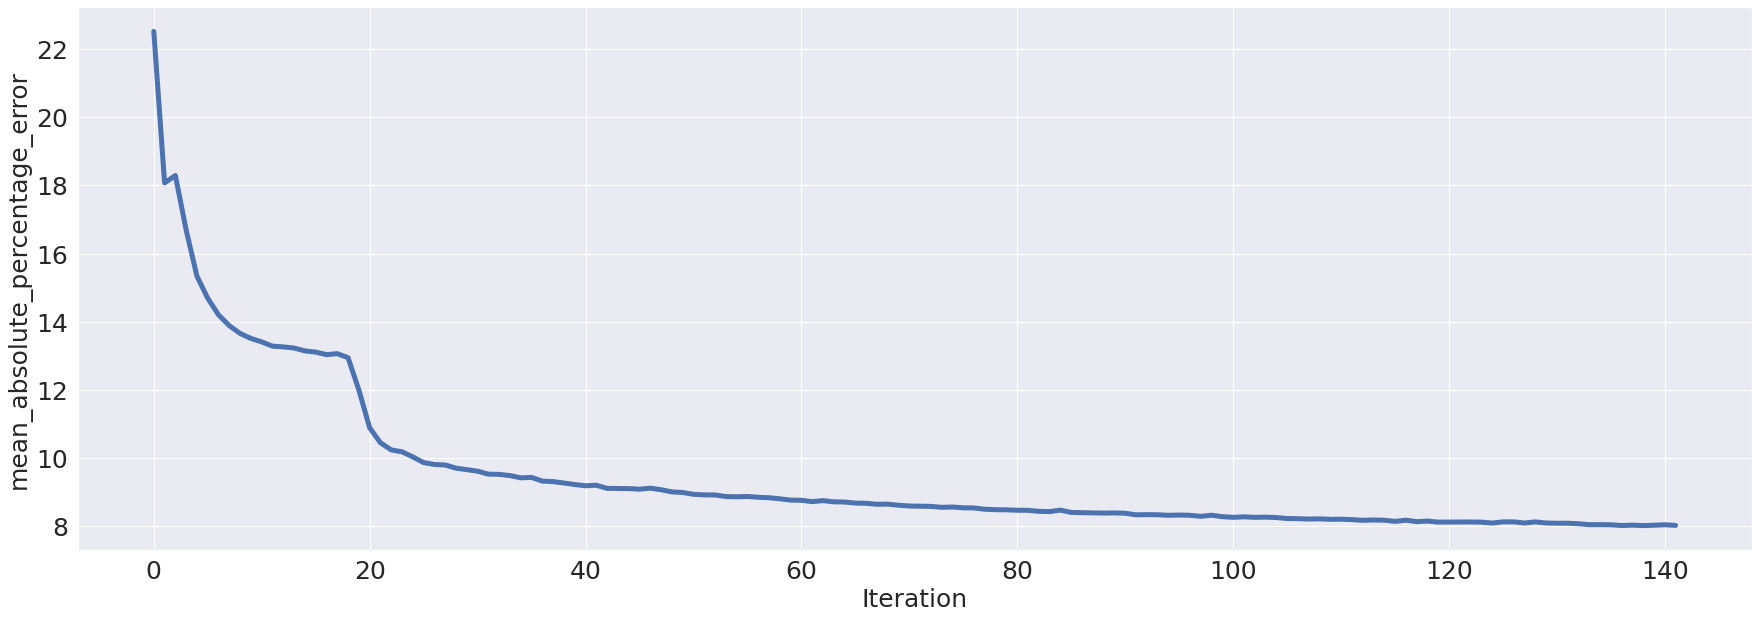

In [12]:
# sns.lineplot(x='Iteration', y='val_mean_absolute_percentage_error', data=training_df, hue='Trial-ID'); plt.ylim(0, 10);
sns.lineplot(x='Iteration', y='mean_absolute_percentage_error', data=training_df[training_df['Trial-ID'] == best_trial_id], lw=5);

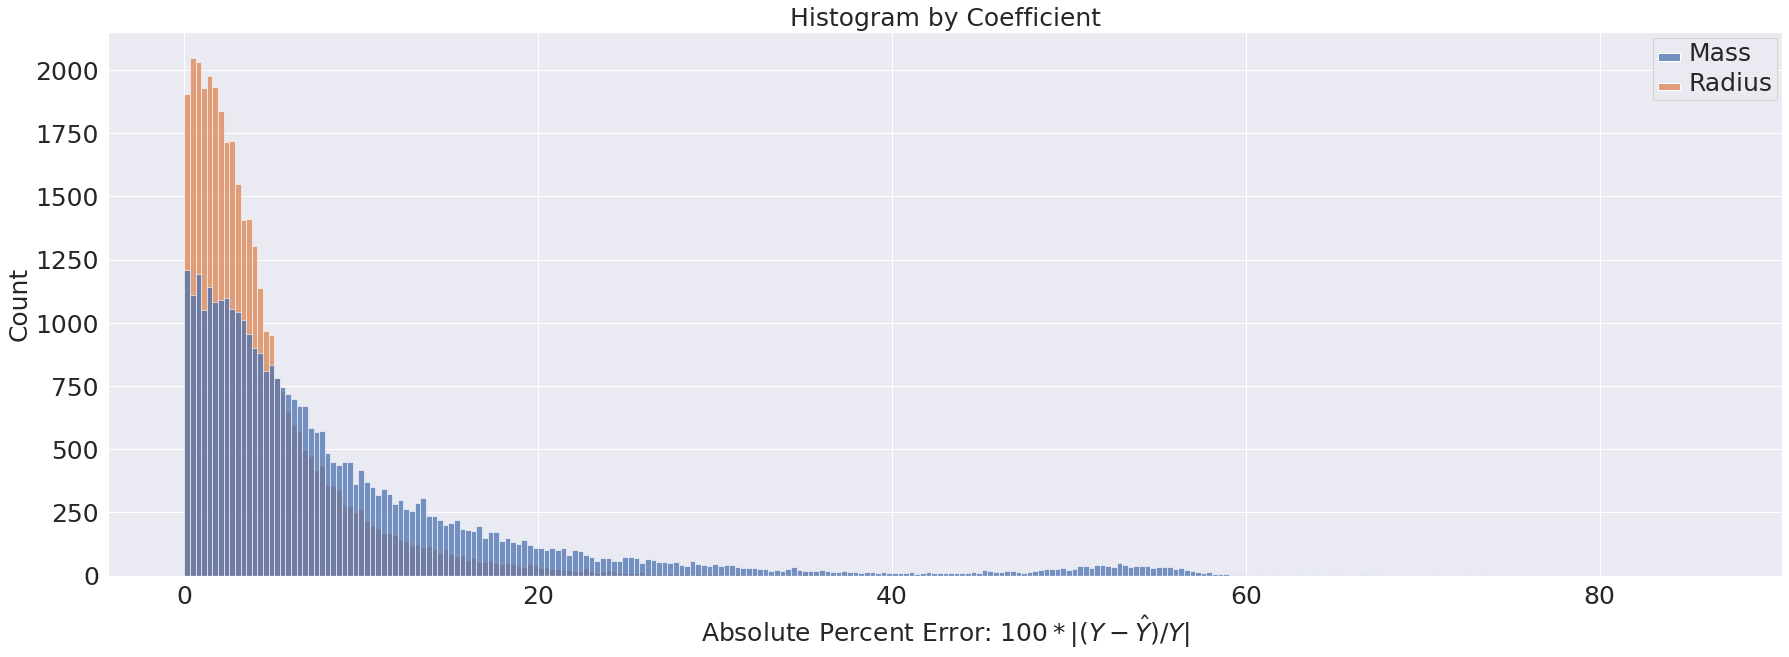

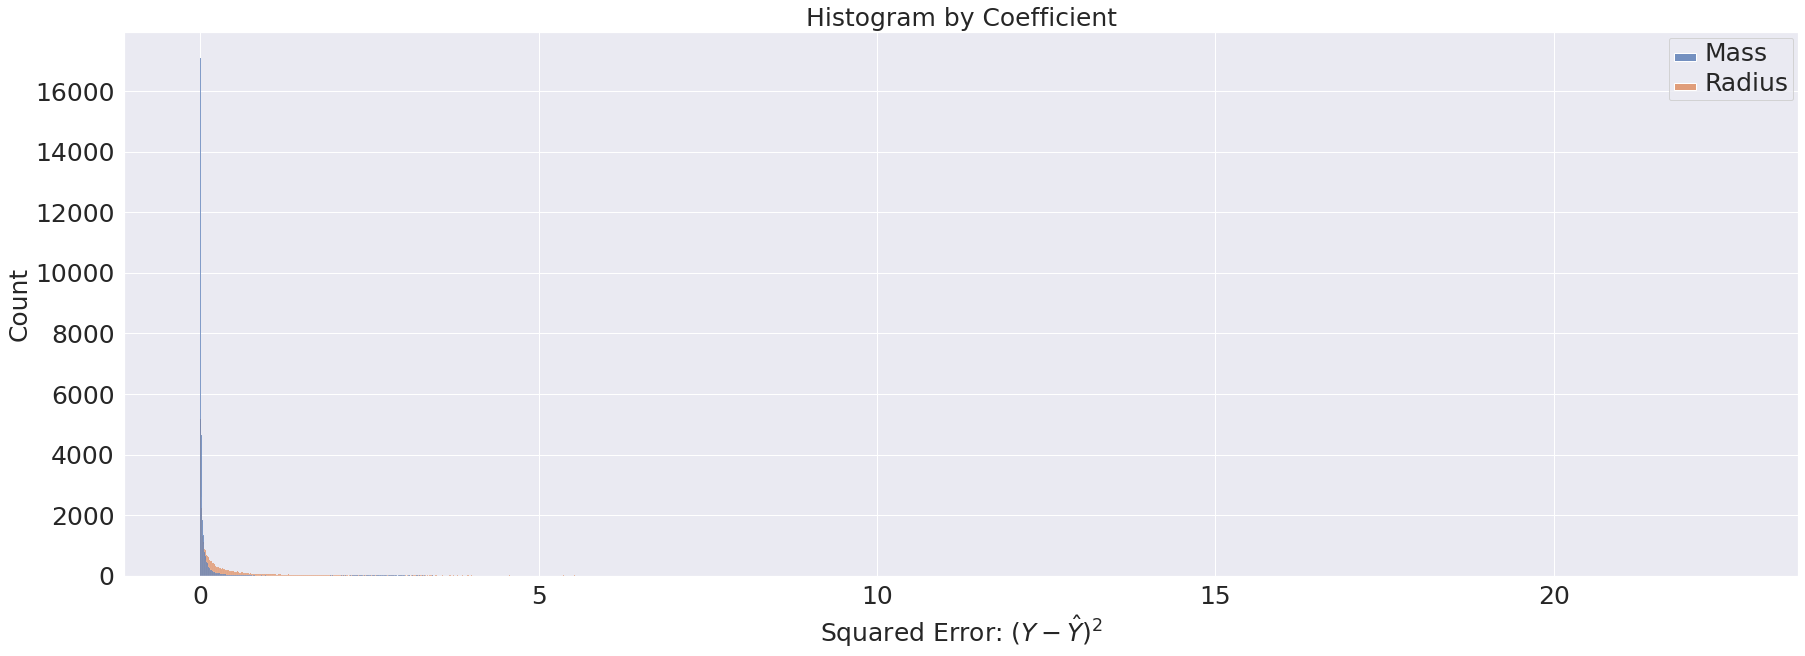

In [16]:
test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2mr/Predictions/validation_%05d_01.csv' % best_trial_id
best_trial_pred = pd.read_csv(test_file, index_col=0)

ns.analysis.plot_overall(best_trial_pred, 'spectra+star2mr')

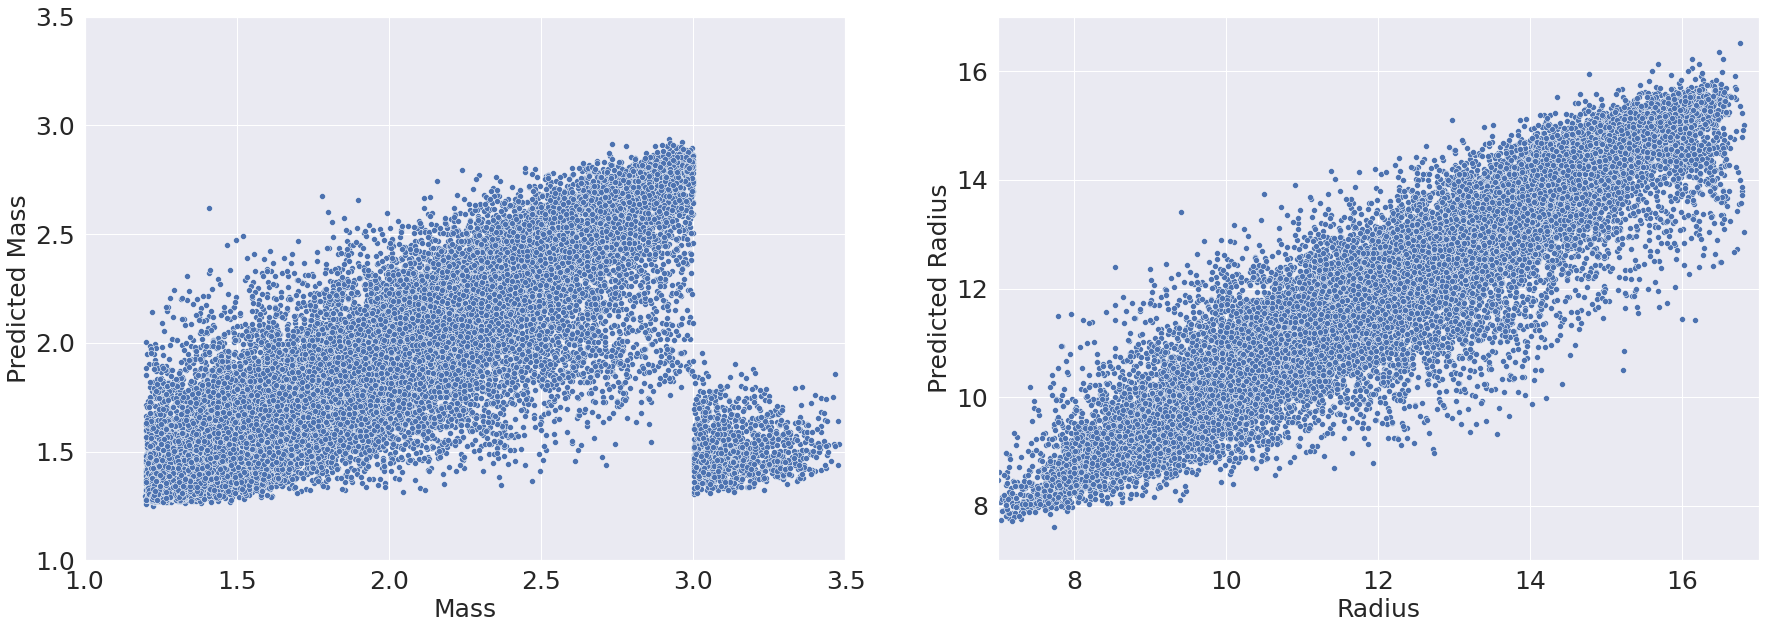

In [28]:
# sns.scatterplot(x='pred_Mass', y='pred_Radius', data=best_trial_pred)
plt.subplot(1,2,1)
sns.scatterplot(x='Mass', y='pred_Mass', data=best_trial_pred); plt.ylabel('Predicted Mass')
plt.xlim(1., 3.5); plt.ylim(1., 3.5)

plt.subplot(1,2,2)
sns.scatterplot(x='Radius', y='pred_Radius', data=best_trial_pred); plt.ylabel('Predicted Radius');
plt.xlim(7, 17); plt.ylim(7, 17);

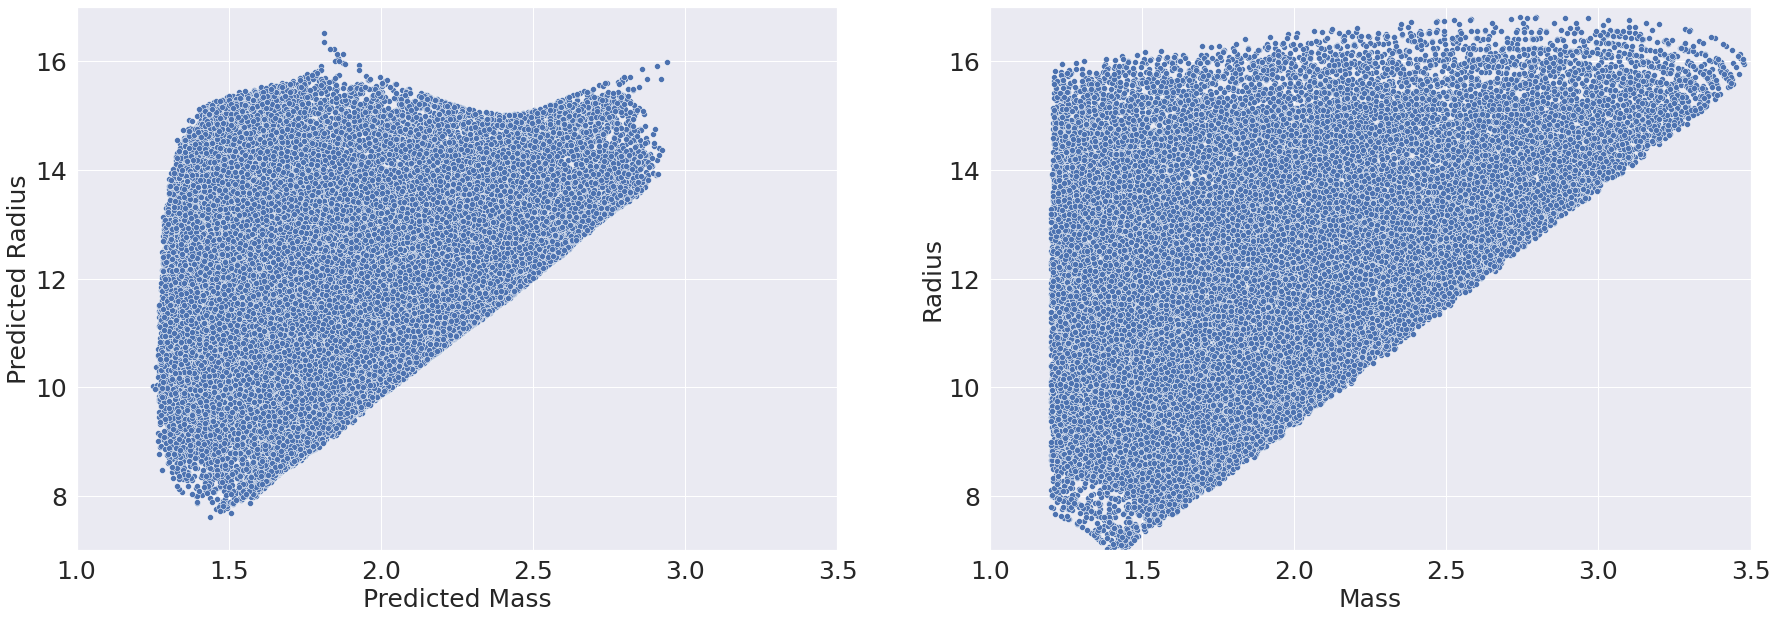

In [25]:
# sns.scatterplot(x='pred_Mass', y='pred_Radius', data=best_trial_pred)
plt.subplot(1,2,1)
sns.scatterplot(x='pred_Mass', y='pred_Radius', data=best_trial_pred); plt.ylabel('Predicted Radius'); plt.xlabel('Predicted Mass')
plt.xlim(1., 3.5); plt.ylim(7, 17);

plt.subplot(1,2,2)
sns.scatterplot(x='Mass', y='Radius', data=best_trial_pred); plt.ylabel('Radius'); plt.xlabel('Mass')
plt.xlim(1., 3.5); plt.ylim(7, 17);

In [65]:
# GET DATA LOADER
data_loader = get_data_loader('spectra2star+eos')

train = pd.read_csv('Results/spectra+star2mr/Predictions/train_00001_01.csv', index_col=0)
train[data_loader.args['output_columns']] = data_loader.train_gen.Y

val = pd.read_csv('Results/spectra+star2mr/Predictions/validation_00001_01.csv', index_col=0)
val[data_loader.args['output_columns']] = data_loader.validation_gen.Y

# COMBINE TRAIN AND VALIDATION
all_df = pd.concat([train, val], ignore_index=True)

Text(0.5, 1.0, 'True')

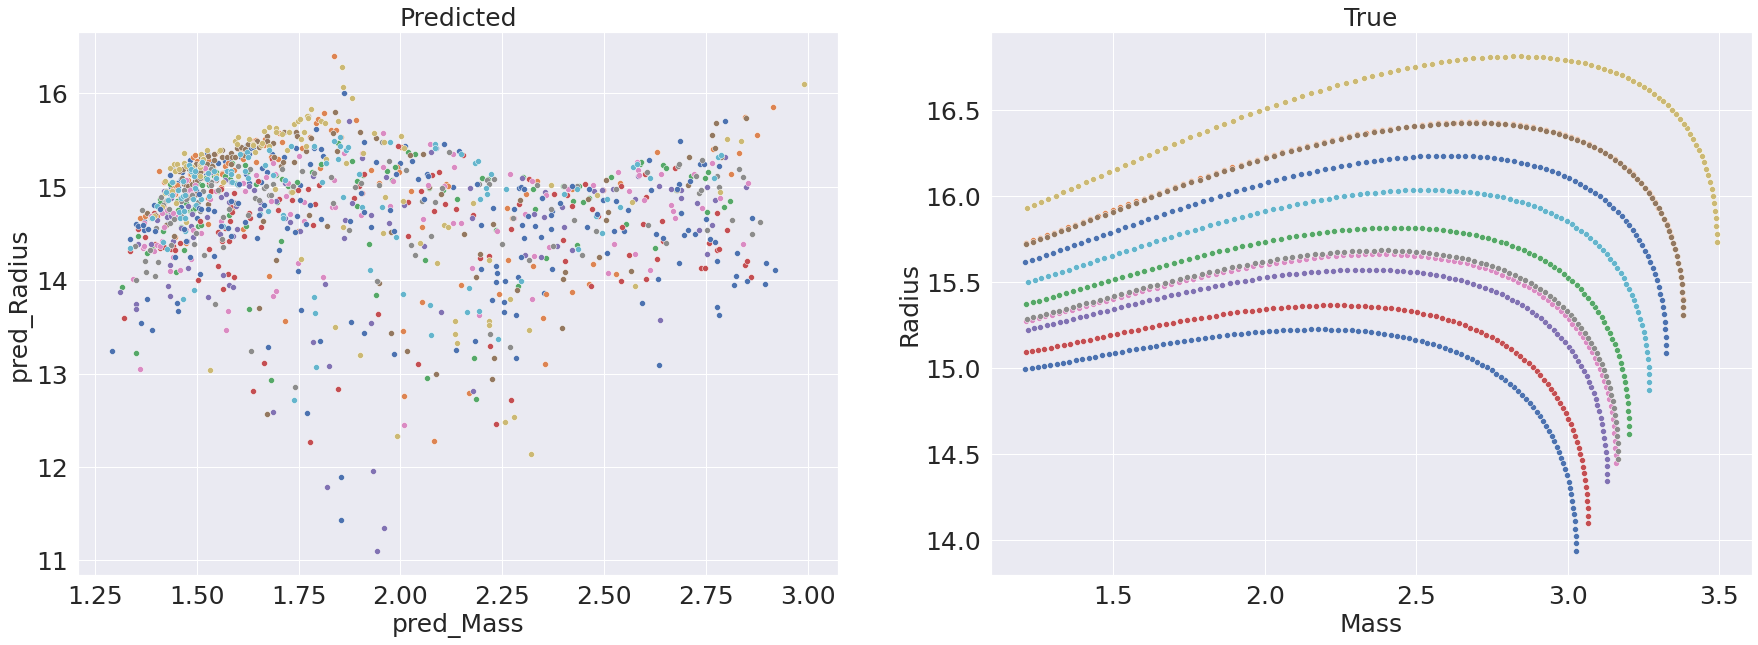

In [67]:
count = 0
_, (ax1, ax2) = plt.subplots(1,2)
for _, group in all_df.groupby(['c1', 'c2']):
    sns.scatterplot(x='pred_Mass', y='pred_Radius', data=group.sort_values(by='pred_Mass'), ax=ax1)
    sns.scatterplot(x='Mass', y='Radius', data=group.sort_values(by='pred_Mass'), ax=ax2)
    
    count += 1
    if count > 10:
        break

ax1.set_title('Predicted')
ax2.set_title('True')

# Spectra --> EOS
---
### HP Search Results

In [5]:
training_df = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/results.csv')
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra2eos', num_files=500)
best_trial_id = int(hp_trial_erros.idxmin())
hp_trial_erros.sort_values(by='error').head(10)

100%|██████████| 93/93 [00:03<00:00, 26.04it/s]


error
53  2.325217
82  2.326760
27  2.329346
17  2.330218
71  2.330641
41  2.334924
57  2.338391
52  2.340197
42  2.343757
22  2.344311

In [6]:
# sns.lineplot(x='Iteration', y='val_mean_absolute_percentage_error', data=training_df, hue='Trial-ID'); plt.ylim(0, 10);
# sns.lineplot(x='Iteration', y='val_mean_absolute_percentage_error', data=training_df[training_df['Trial-ID'] == best_trial_id], lw=5);

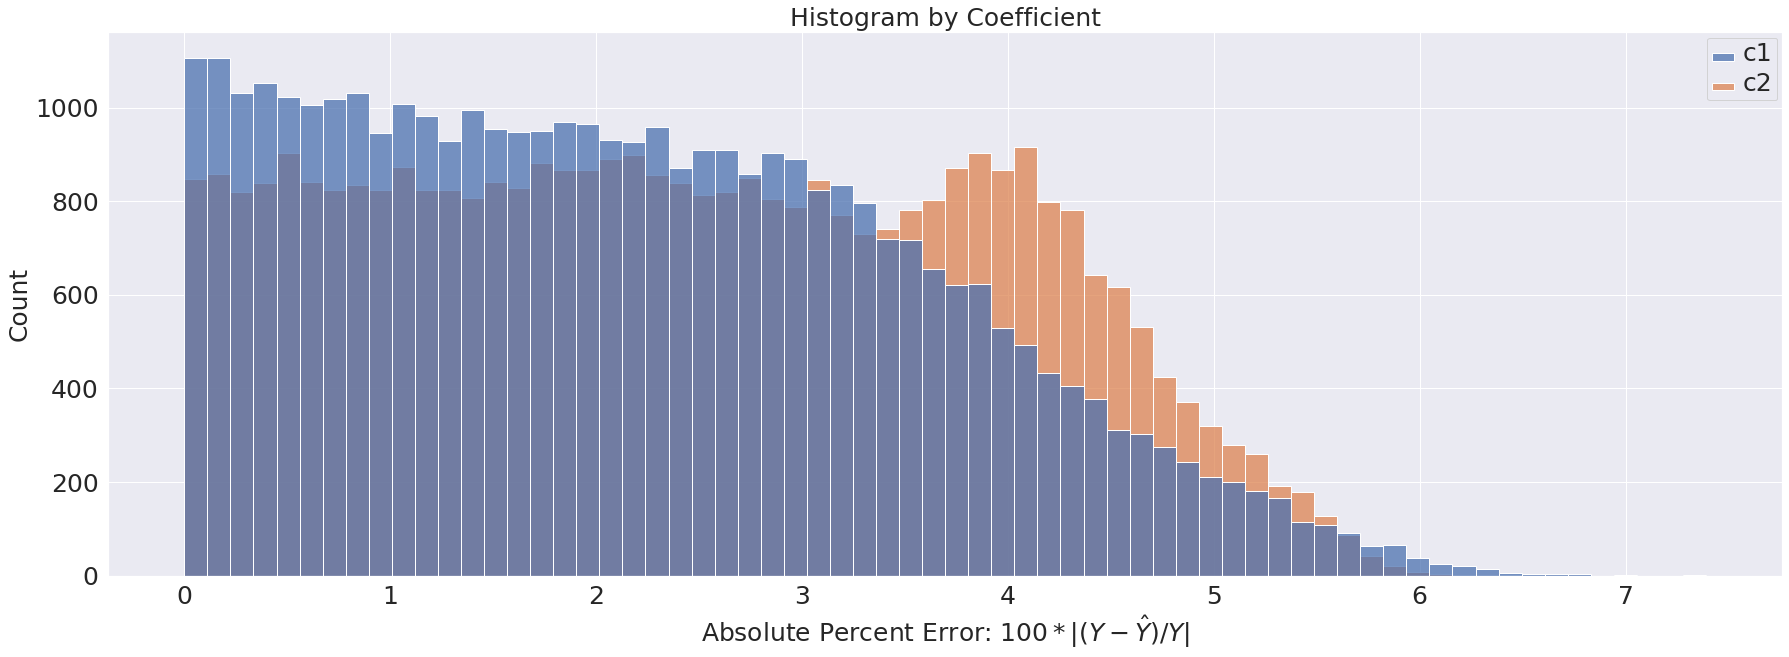

In [6]:
test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/Predictions/validation_%05d_01.csv' % best_trial_id
best_trial_pred = pd.read_csv(test_file, index_col=0)[['c1', 'c2', 'pred_c1', 'pred_c2']]

ns.analysis.plot_overall(best_trial_pred, 'spectra2eos')

KeyError: 'c1'

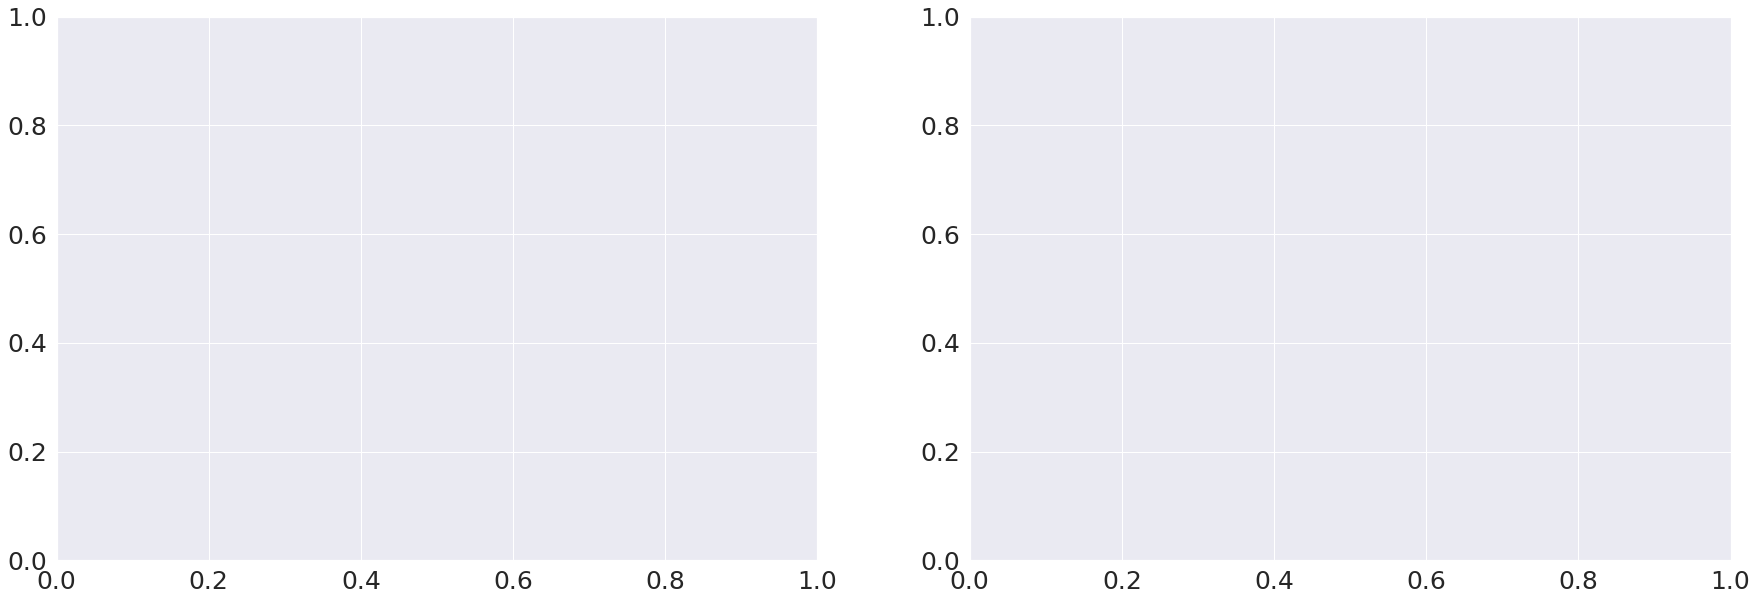

In [50]:
plot_true_vs_pred_coefficients(best_trial_pred, 'Trained on Raw Spectra')

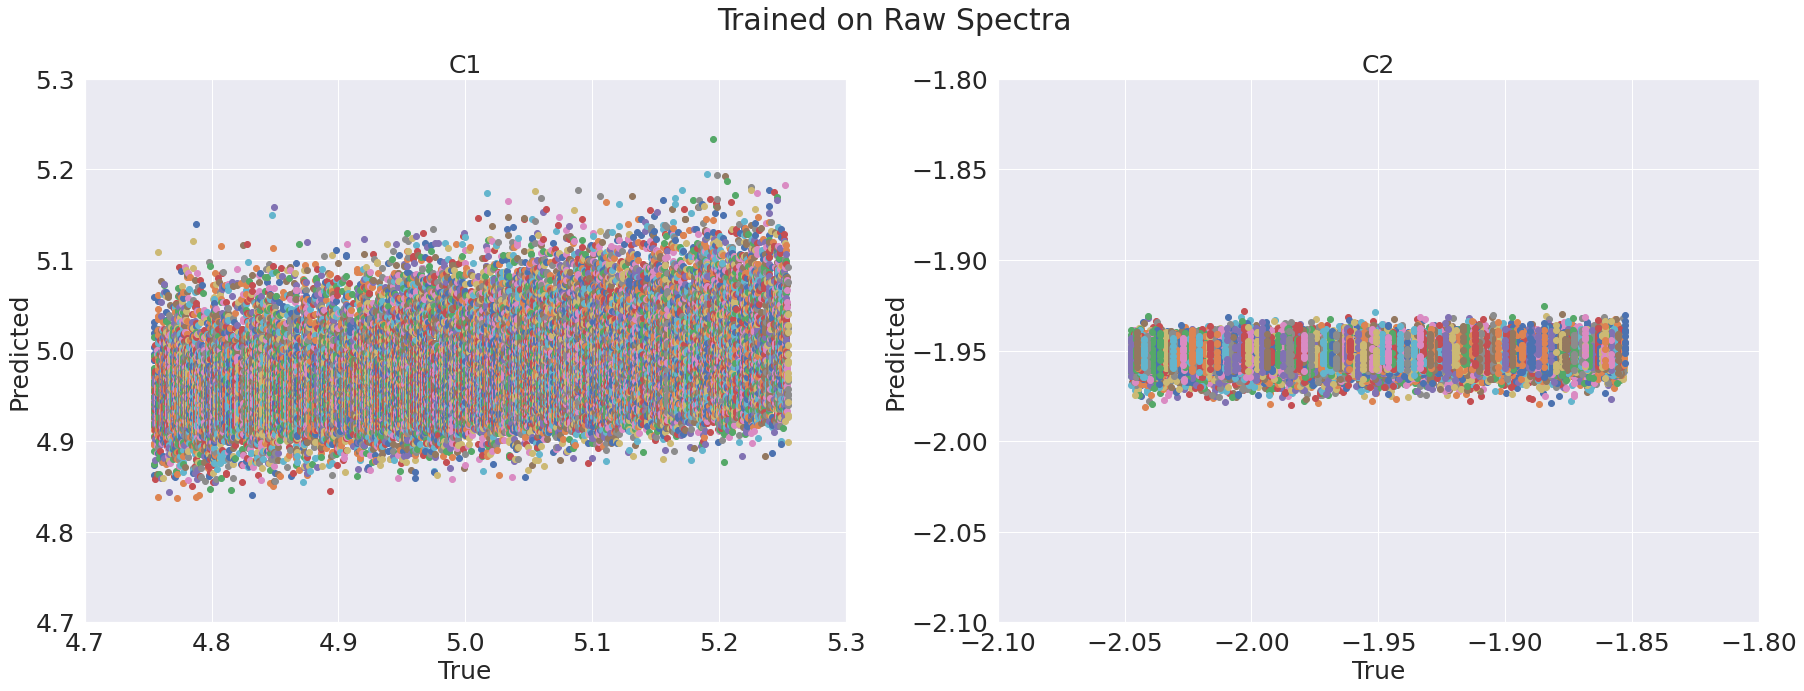

In [15]:
plot_true_vs_pred_coefficients(best_trial_pred, 'Trained on Raw Spectra')

### Cross Validation

In [10]:
ns.analysis.get_crossval_command(paradigm='spectra2eos', trial=61)

To run 10 fold cross-validation for this model:
 tf2 main.py --load_settings_from /baldig/physicstest/NeutronStarsData/SherpaResults/spectra2eos/Settings/00061.json


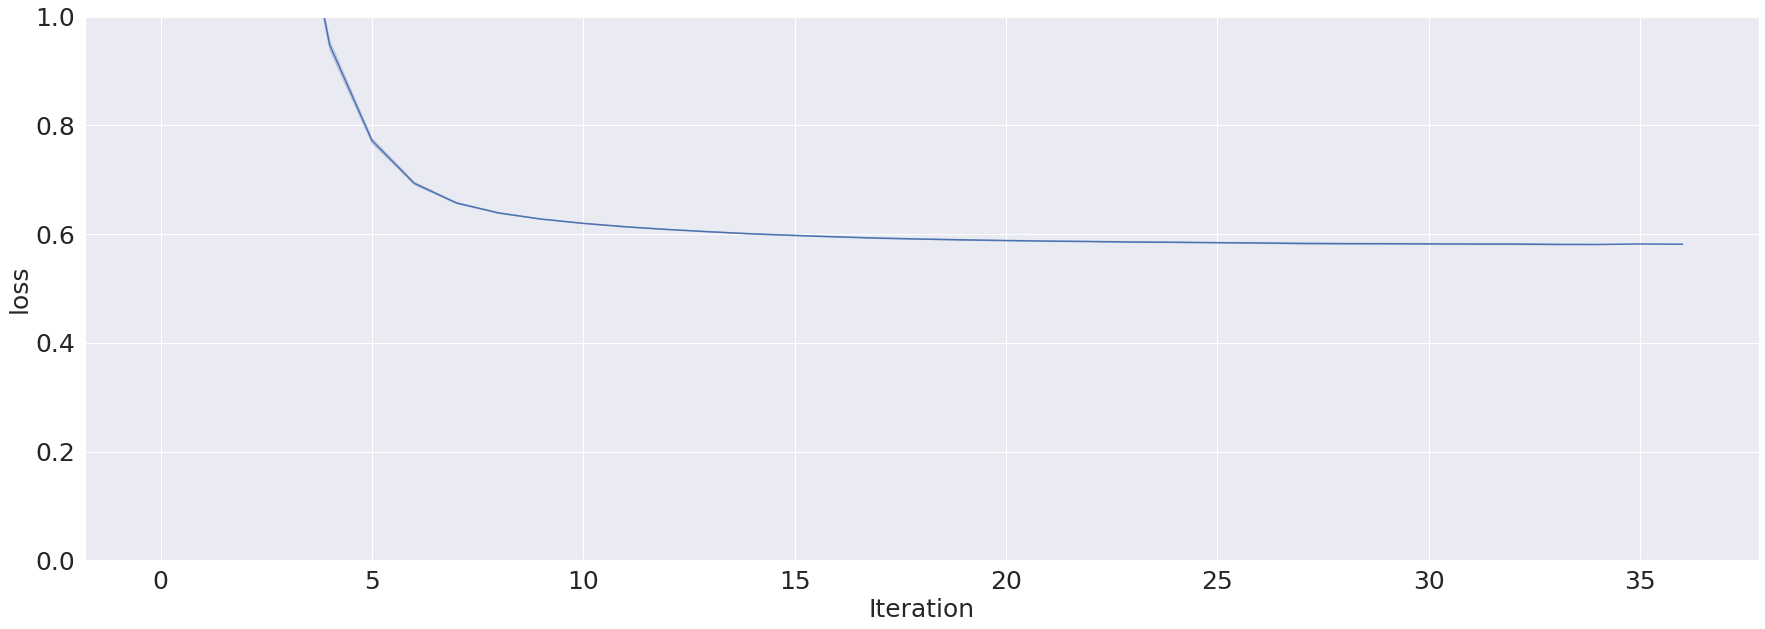

In [62]:
# df = ns.analysis.cross_validation('Results/spectra2eos/Training/%05d_*.csv' % 61)
# sns.lineplot(x='Iteration', y='loss', data=df); plt.ylim(0, 1);

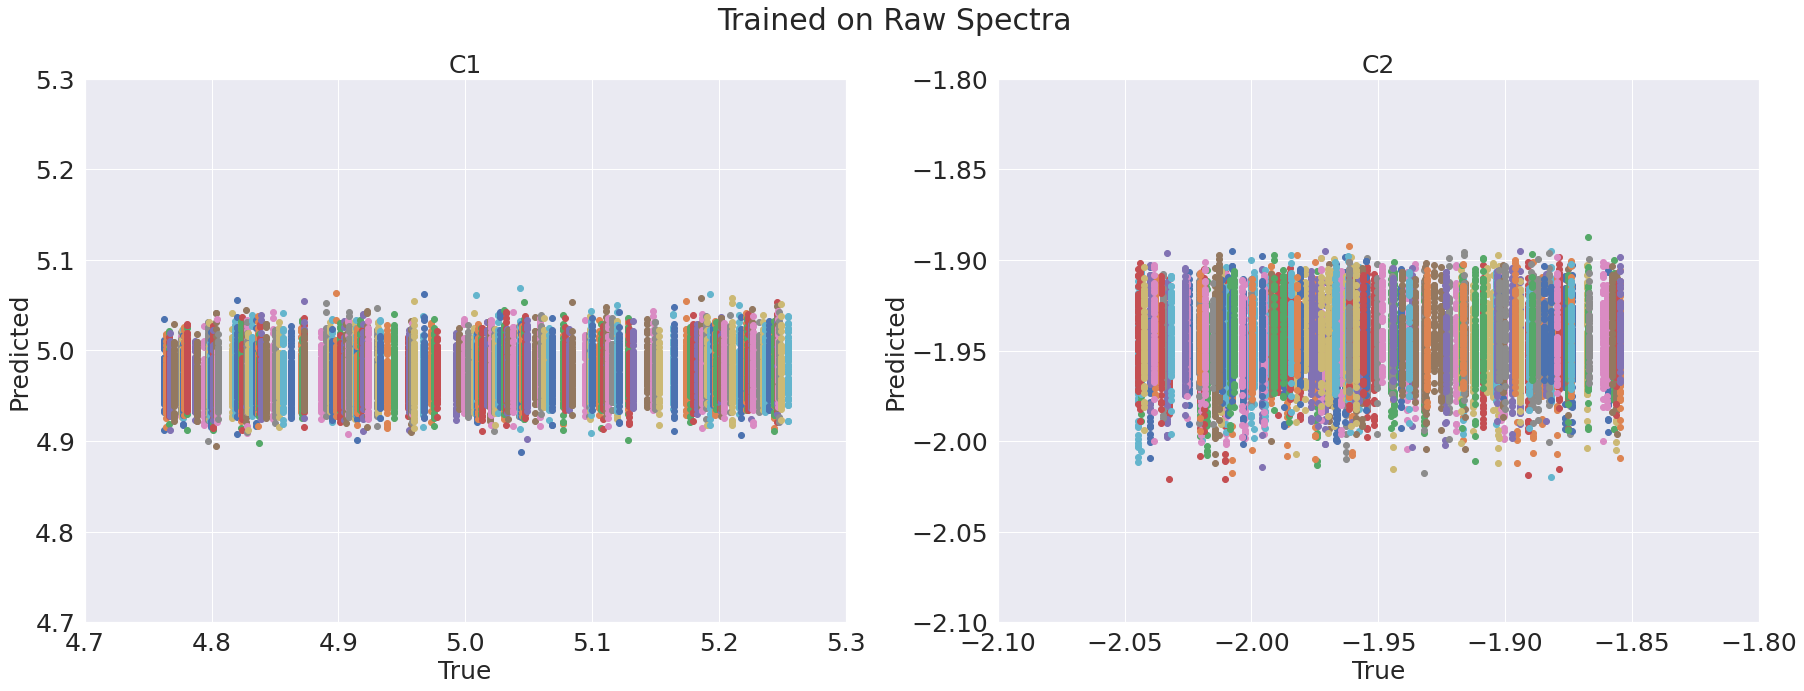

In [10]:
df = ns.analysis.cross_validation('Results/spectra2eos/Predictions/validation_%05d_*.csv' % 61)
plot_true_vs_pred_coefficients(df, 'Trained on Raw Spectra')

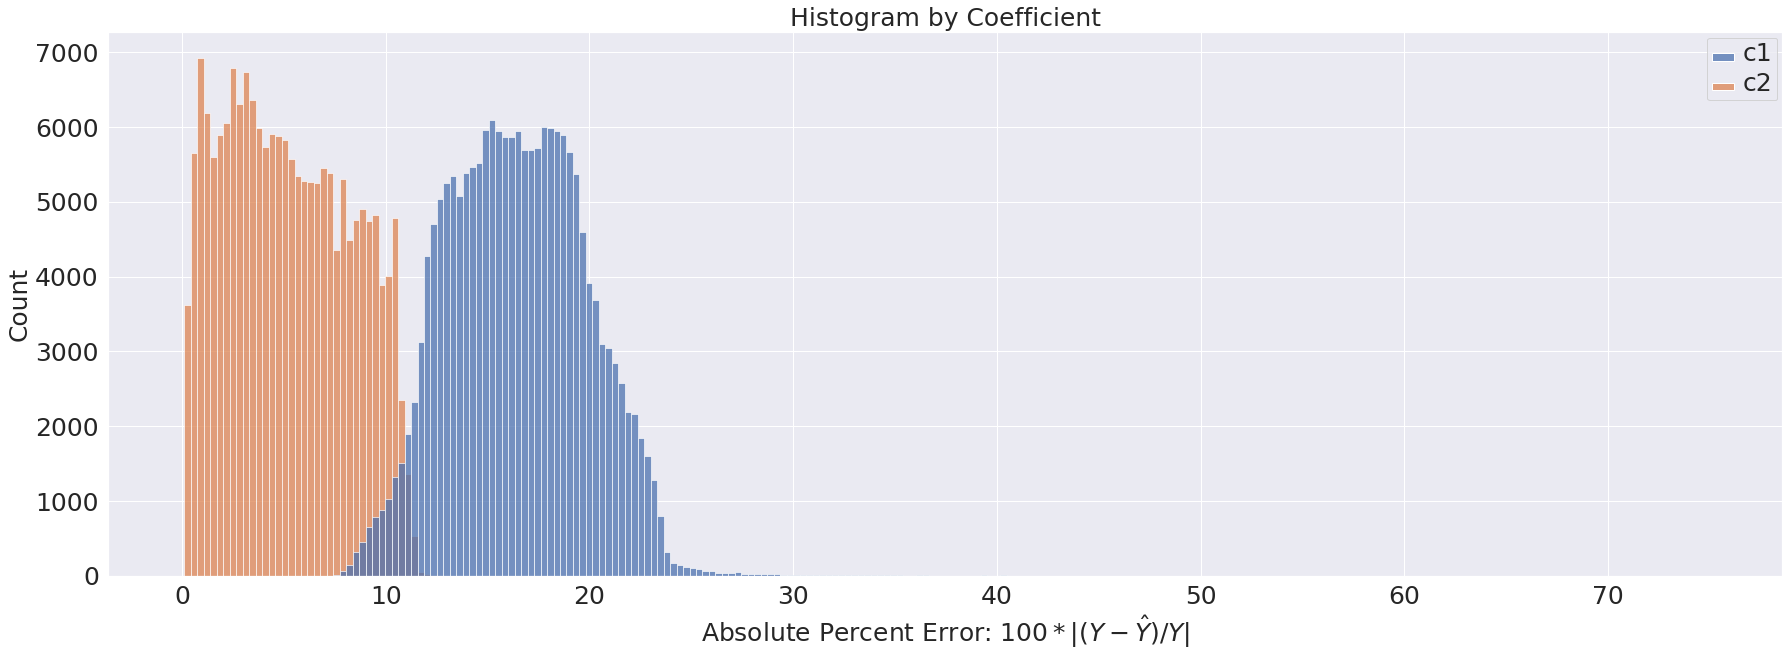

In [101]:
ns.analysis.plot_overall(all_df, 'spectra2eos')

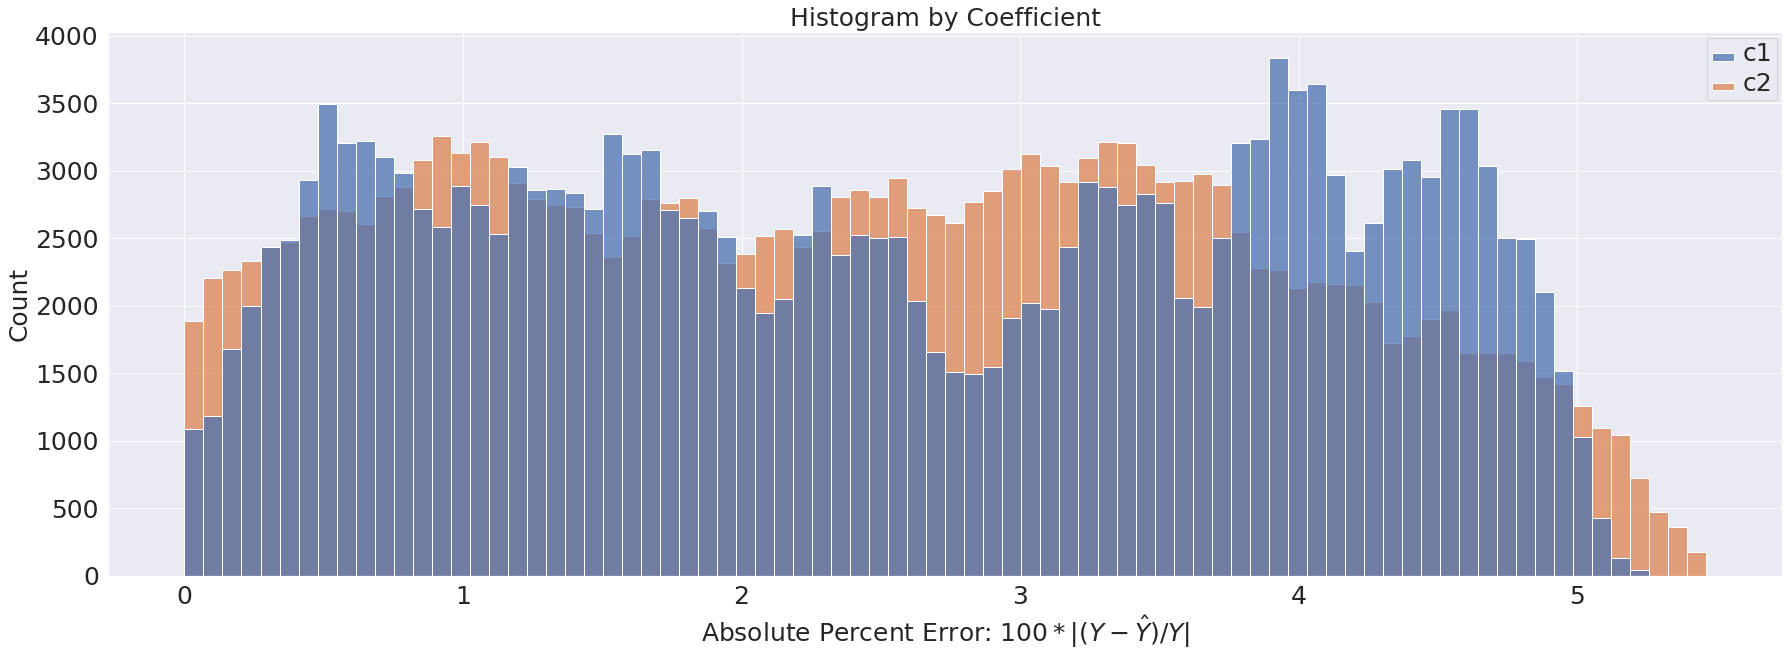

In [11]:
df[['pred_c1', 'pred_c2']] = df[['c1', 'c2']].mean().values + .02 * np.random.rand(*df[['pred_c1', 'pred_c2']].shape)
ns.analysis.plot_overall(df, 'spectra2eos')

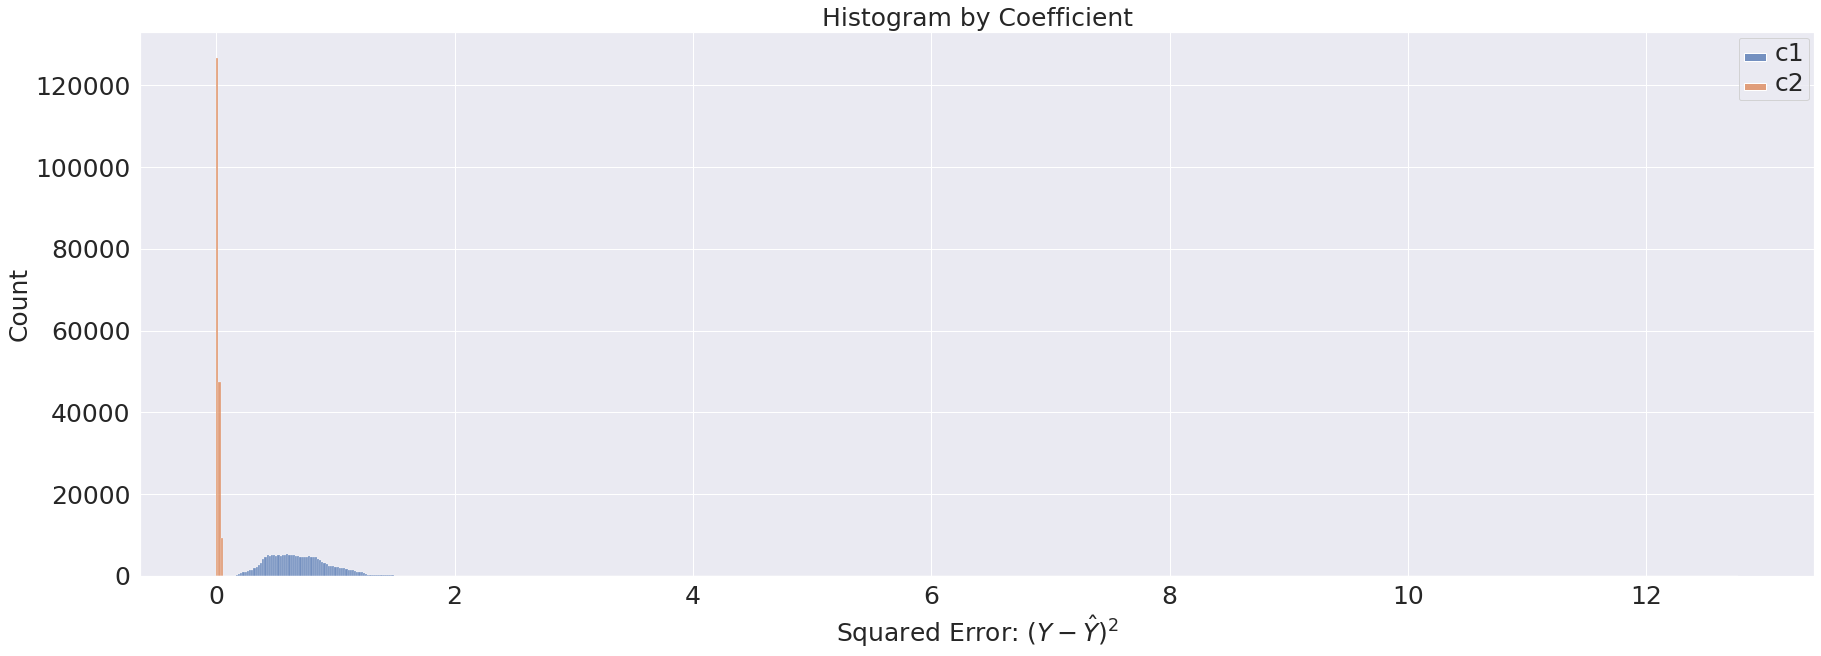

In [100]:
ns.analysis.plot_overall(spectra2eos_cv, 'spectra2eos', metric_type='mse')

In [13]:
ns.analysis.get_poisson_command(paradigm='spectra2eos', trial=61)

To run poisson uncertainty augmentation:
 tf2 main.py --run_type uncertain --model_dir Results/spectra2eos/Models/00061/ --paradigm spectra2eos --load_settings_from Results/spectra2eos/Settings/00061.json


### Groupby Unique EOS

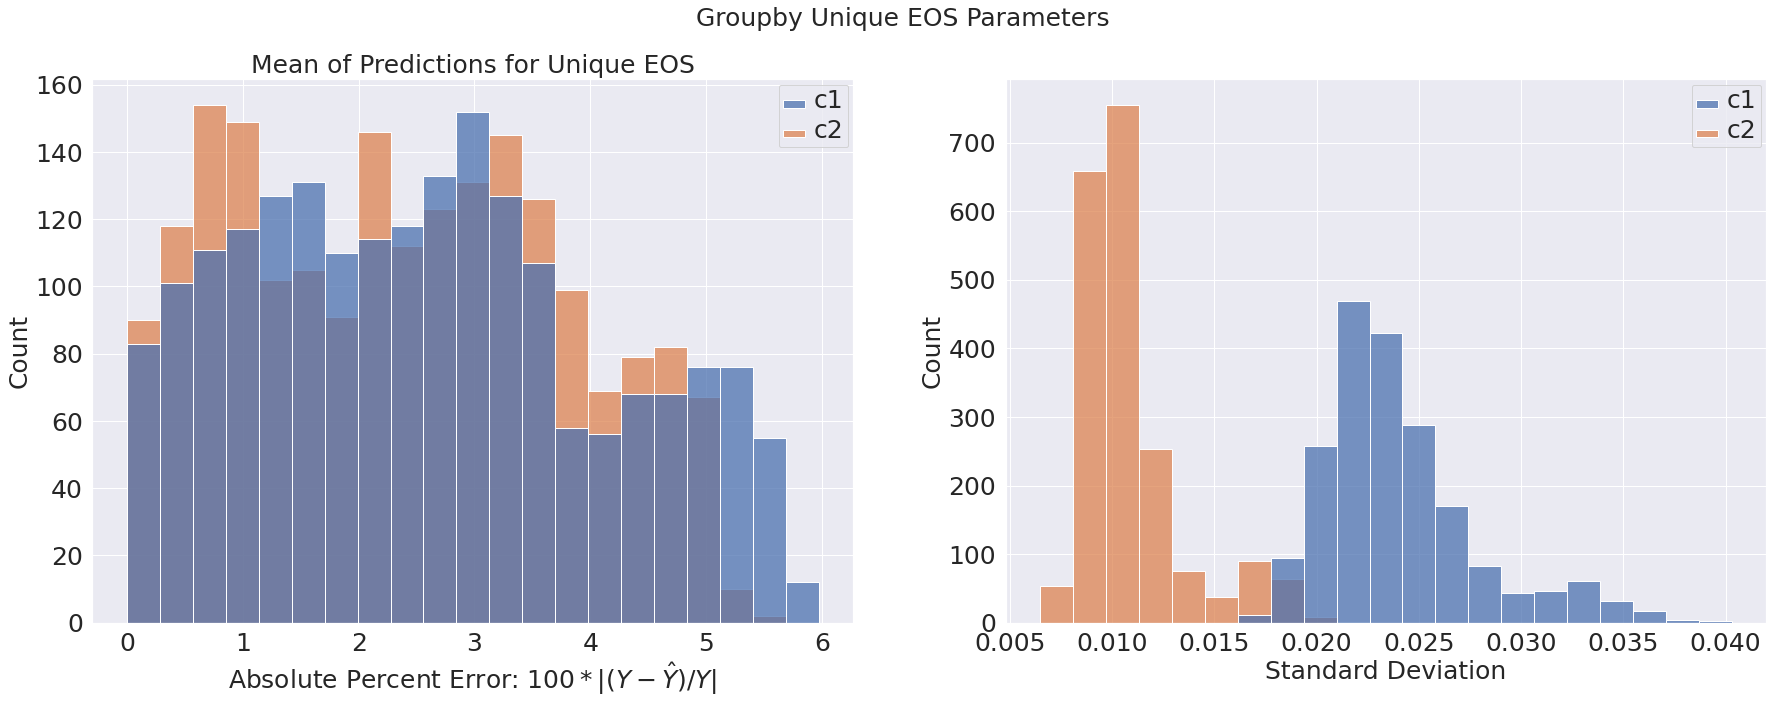

In [31]:
ns.analysis.groupby_unique_eos(spectra2eos_cv, paradigm='spectra2eos')

### Poisson Noise

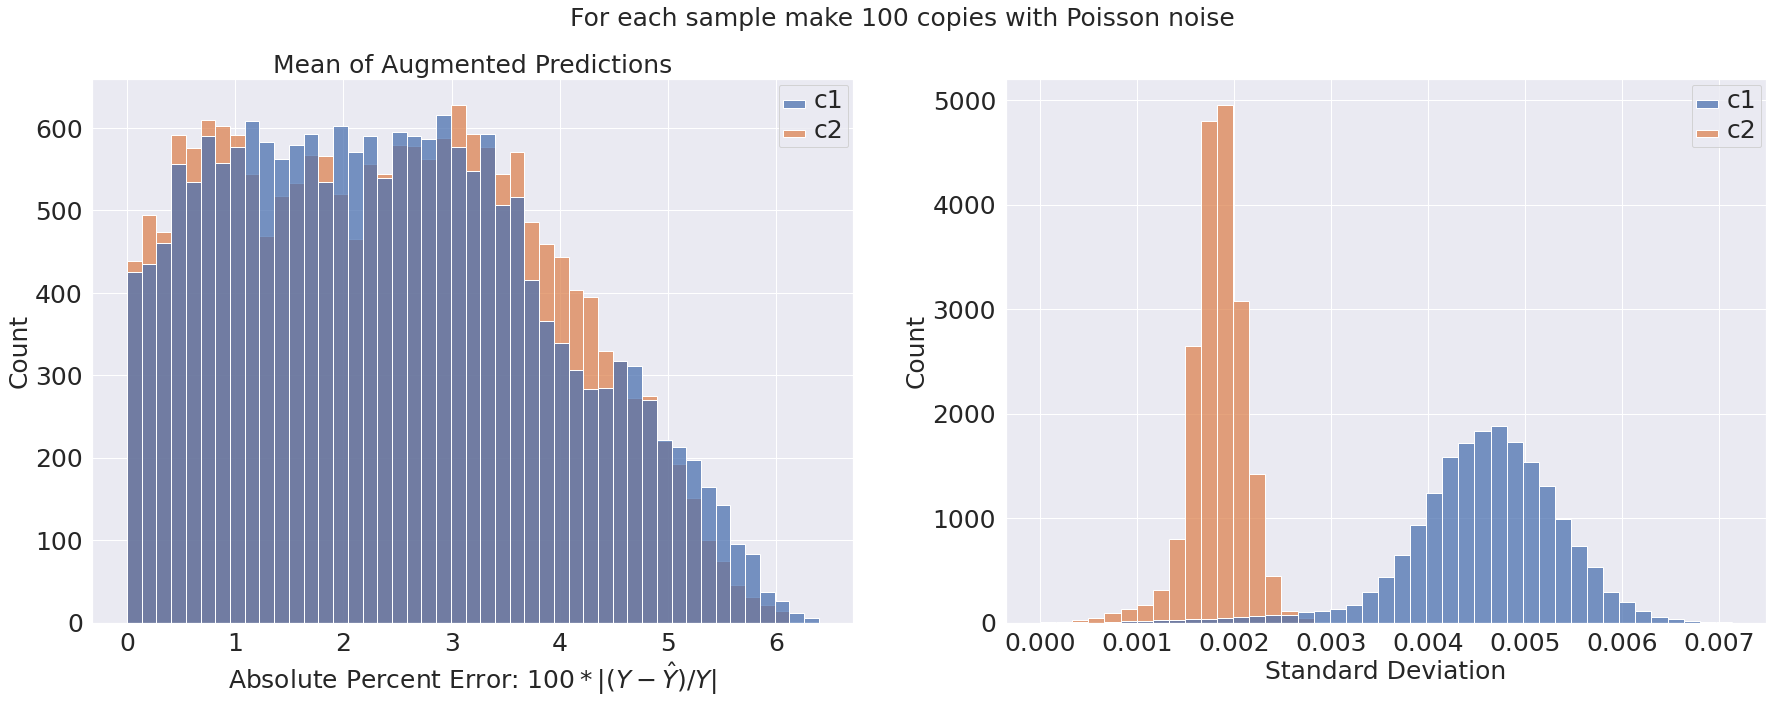

In [15]:
ns.analysis.groupby_poisson_noise('spectra2eos', trial=61)

### Coefficients Along Mass-Radius Curves

In [16]:
data_loader = get_data_loader(paradigm='spectra2eos')

In [18]:
train = pd.read_csv('Results/spectra2eos/Predictions/train_00001_01.csv', index_col=0)
train[args['output_columns']] = data_loader.train_gen.Y

val = pd.read_csv('Results/spectra2eos/Predictions/validation_00001_01.csv', index_col=0)
val[args['output_columns']] = data_loader.validation_gen.Y

all_df = pd.concat([train, val], ignore_index=True)

In [32]:
df = pd.DataFrame()
for _, group in all_df.groupby(['c1', 'c2']):
    dist = (1.5 - group.Mass).abs()
    min_idx = dist.idxmin()
    if dist.min() < .001:
        row = all_df.iloc[min_idx].to_frame().T
        df = pd.concat([df, row])

df_sorted = df.sort_values(by='Radius')

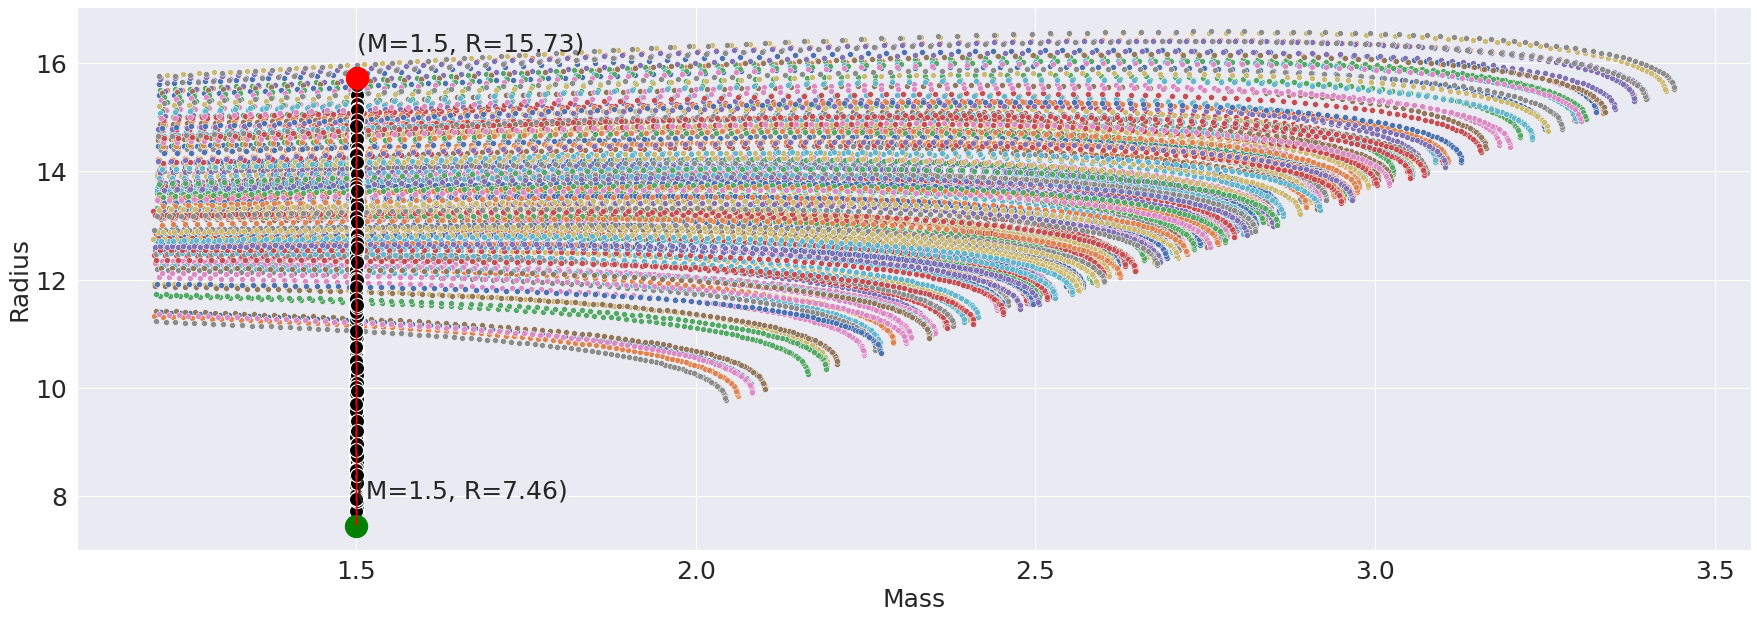

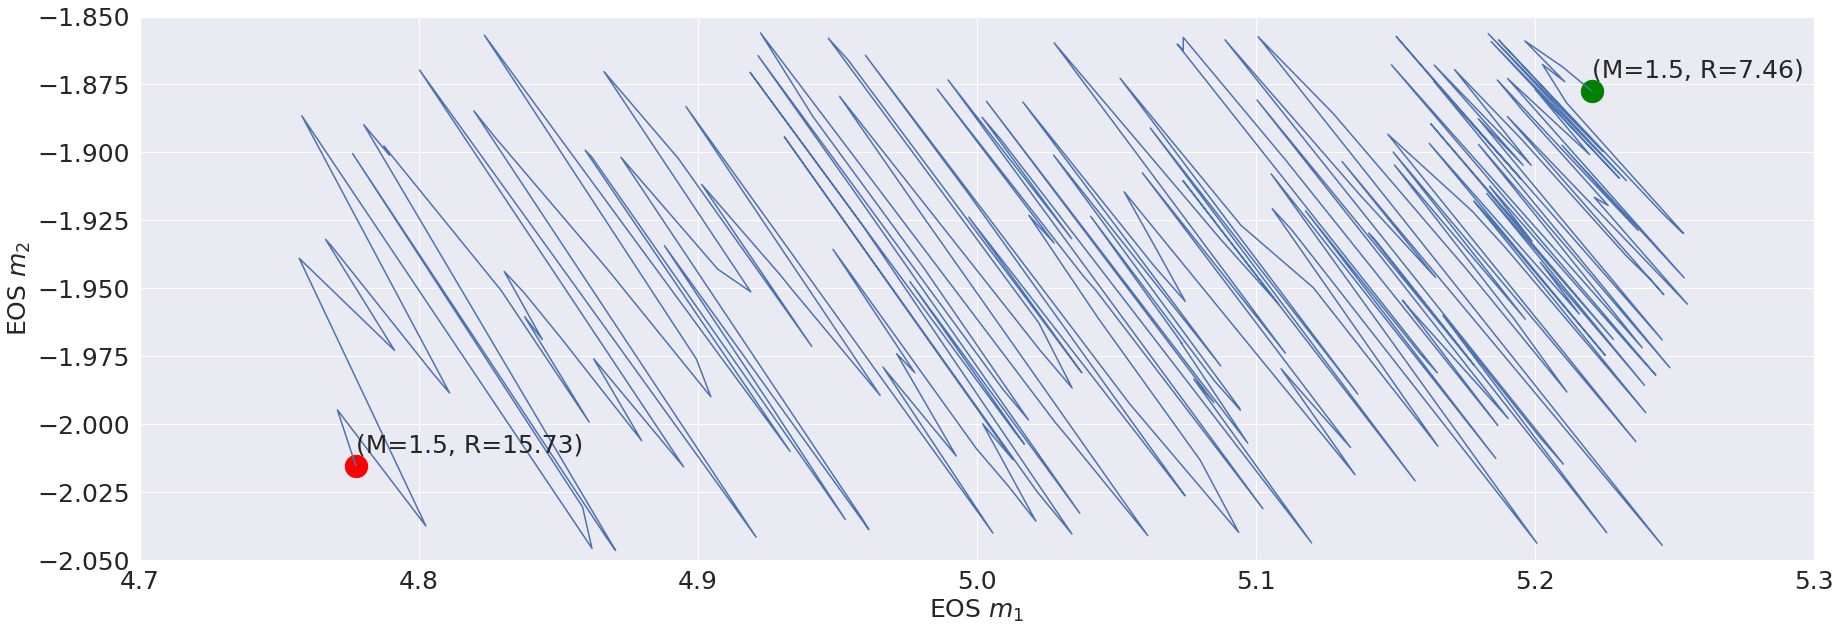

In [40]:
count = 0
for _, group in all_df.groupby(['c1', 'c2']):
    if count % 5 == 0:
        sns.scatterplot(x='Mass', y='Radius', data=group)
    count += 1
    if count > 1000: break
        
mass = df_sorted.Mass.values
radius = df_sorted.Radius.values

sns.scatterplot(x='Mass', y='Radius', data=df, s=200, color='black')
plt.scatter(mass[0], radius[0], color='green', s=500)
plt.scatter(mass[-1], radius[-1], color='red', s=500);
plt.plot(mass, radius, color='red')
plt.text(mass[0], df_sorted.Radius.values[0]+.5, f"(M={mass[0].round(2)}, R={radius[0].round(2)})")
plt.text(mass[-1], df_sorted.Radius.values[-1]+.5, f"(M={mass[-1].round(2)}, R={radius[-1].round(2)})")
plt.show()


# plt.subplot(1,2,1)
x = df_sorted.c1.values
y = df_sorted.c2.values
plt.scatter(x[0], y[0], color='green', s=500)
plt.scatter(x[-1], y[-1], color='red', s=500)
plt.plot(x,y); plt.ylim(-2.05, -1.85); plt.xlim(4.7, 5.3);
plt.text(x[0], y[0]+.005, f"(M={df_sorted.Mass.values[0].round(2)}, R={df_sorted.Radius.values[0].round(2)})")
plt.text(x[-1], y[-1]+.005, f"(M={df_sorted.Mass.values[-1].round(2)}, R={df_sorted.Radius.values[-1].round(2)})")
plt.xlabel(r'EOS $m_1$'); plt.ylabel(r'EOS $m_2$');

# plt.subplot(1,2,2)
# x = df_sorted.pred_c1.values
# y = df_sorted.pred_c2.values
# plt.scatter(x[0], y[0], color='green', s=500)
# plt.scatter(x[-1], y[-1], color='red', s=500)
# plt.plot(x,y); plt.ylim(-2.05, -1.85); plt.xlim(4.7, 5.3);
# plt.xlabel(r'Predicted EOS $m_1$'); plt.ylabel(r'Predicted EOS $m_2$');

# Spectra + Star --> EOS
---
### HP Search Results

In [16]:
training_df = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/results.csv')
gb = training_df.groupby('Trial-ID').min()
idx = gb[gb.Objective < .1].index
training_df = training_df[training_df['Trial-ID'].isin(idx)]

In [18]:
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra+star2eos', num_files=500)

100%|██████████| 490/490 [00:51<00:00,  9.54it/s]


In [19]:
hp_trial_erros.sort_values(by='error').head(5)

error
93   2.372359
271  2.373708
309  2.388745
355  2.389417
250  2.398408

In [20]:
best_trial_id = int(hp_trial_erros.idxmin())

test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Predictions/validation_%05d_01.csv' % best_trial_id
df = pd.read_csv(test_file, index_col=0)[['c1', 'c2', 'pred_c1', 'pred_c2']]
# test_error, _ = ns.analysis.mse(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

# print('Best trial:', best_trial_id, 'Val:', hp_trial_erros.loc[best_trial_id].values, 'Test:', test_error)

In [21]:
# sns.lineplot(x='Iteration', y='Objective', data=training_df, hue='Trial-ID'); plt.ylim(0, .2);
# sns.lineplot(x='Iteration', y='Objective', data=training_df[training_df['Trial-ID'] == best_trial_id], lw=5);

In [22]:
# _, df_errors = ns.analysis.mape(df, ['c1', 'c2'], ['pred_c1', 'pred_c2'])

# ax = sns.histplot(data=df_errors.abs()); plt.setp(ax.get_legend().get_texts(), fontsize='25')
# plt.xlabel(r'Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25); plt.title('Histogram by Coefficient', fontsize=25);

In [23]:
# !cp $test_file .
# print("scp jott1@openlab.ics.uci.edu:/home/jott1/Projects/NeutronStars/" + test_file.split('/')[-1] + " .")

In [24]:
# args = {'load_settings_from' : '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Settings/%05d.json' % best_trial_id}
# ns.utils.load_settings(args)
# img = mpimg.imread('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra+star2eos/Models/%05d/model.png' % best_trial_id)
# plt.imshow(img.transpose(1,0,2)[::-1]); plt.axis('off'); plt.show();
# args

### Cross Validation

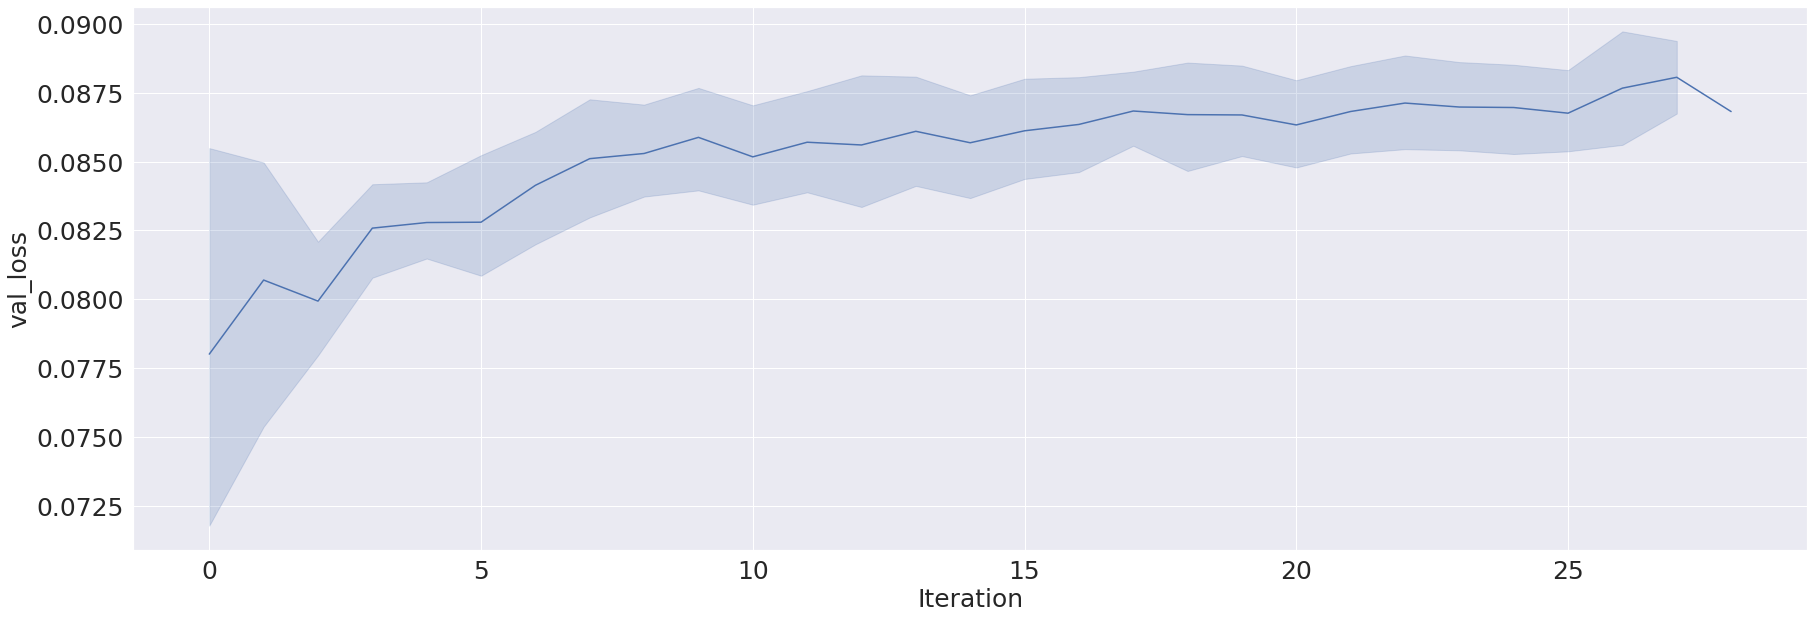

In [25]:
df = ns.analysis.cross_validation('Results/spectra+star2eos/Training/%05d_*.csv' % best_trial_id)
sns.lineplot(x='Iteration', y='val_loss', data=df);

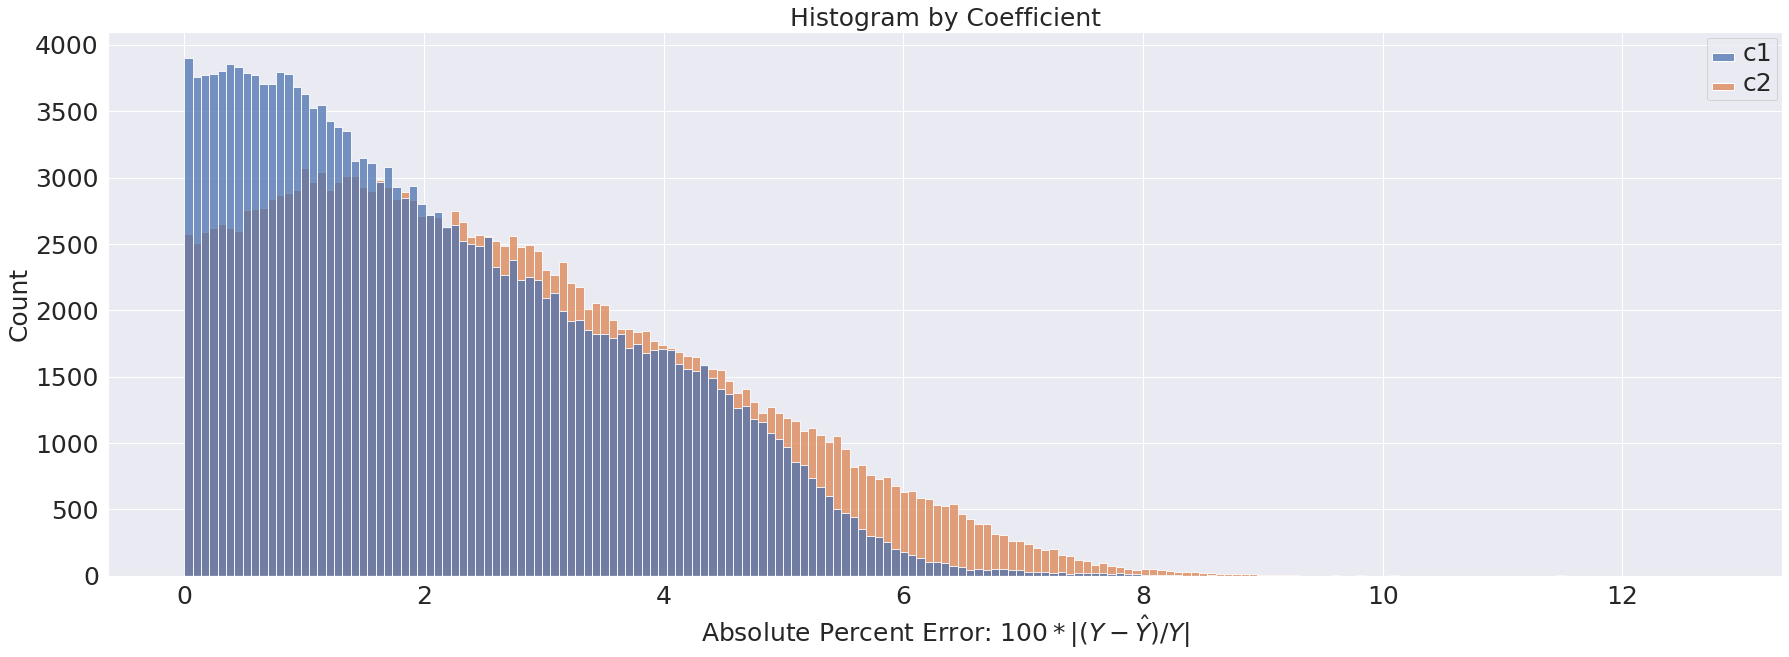

In [13]:
cv_predictions = ns.analysis.cross_validation('Results/spectra+star2eos/Predictions/validation_%05d_*.csv' % 93)
ns.analysis.plot_overall(cv_predictions, 'spectra+star2eos')

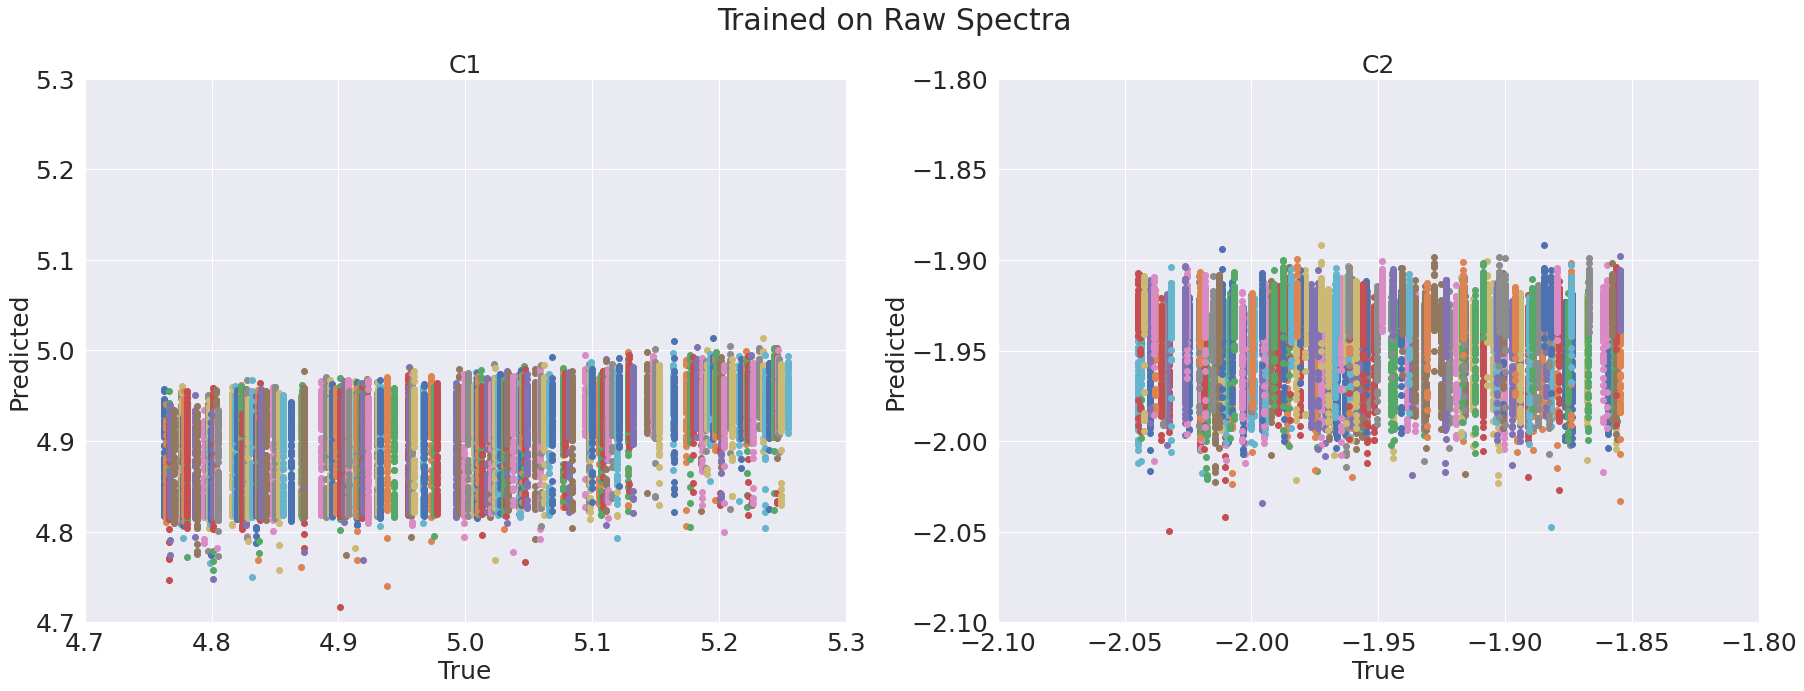

In [14]:
plot_true_vs_pred_coefficients(cv_predictions, 'Trained on Raw Spectra')

### Groupby Unique EOS

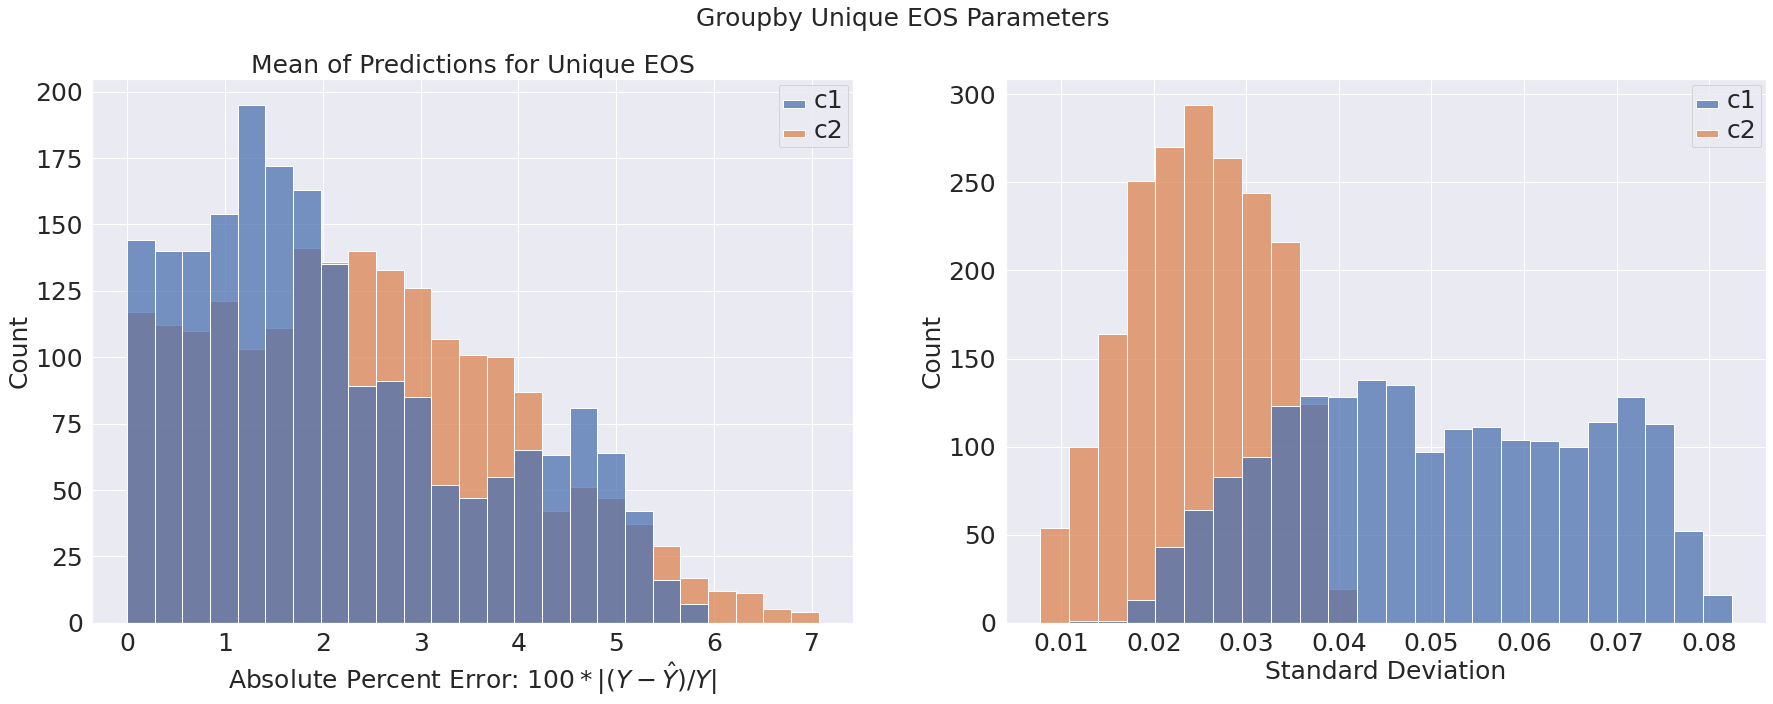

In [27]:
ns.analysis.groupby_unique_eos(cv_predictions, paradigm='spectra+star2eos')

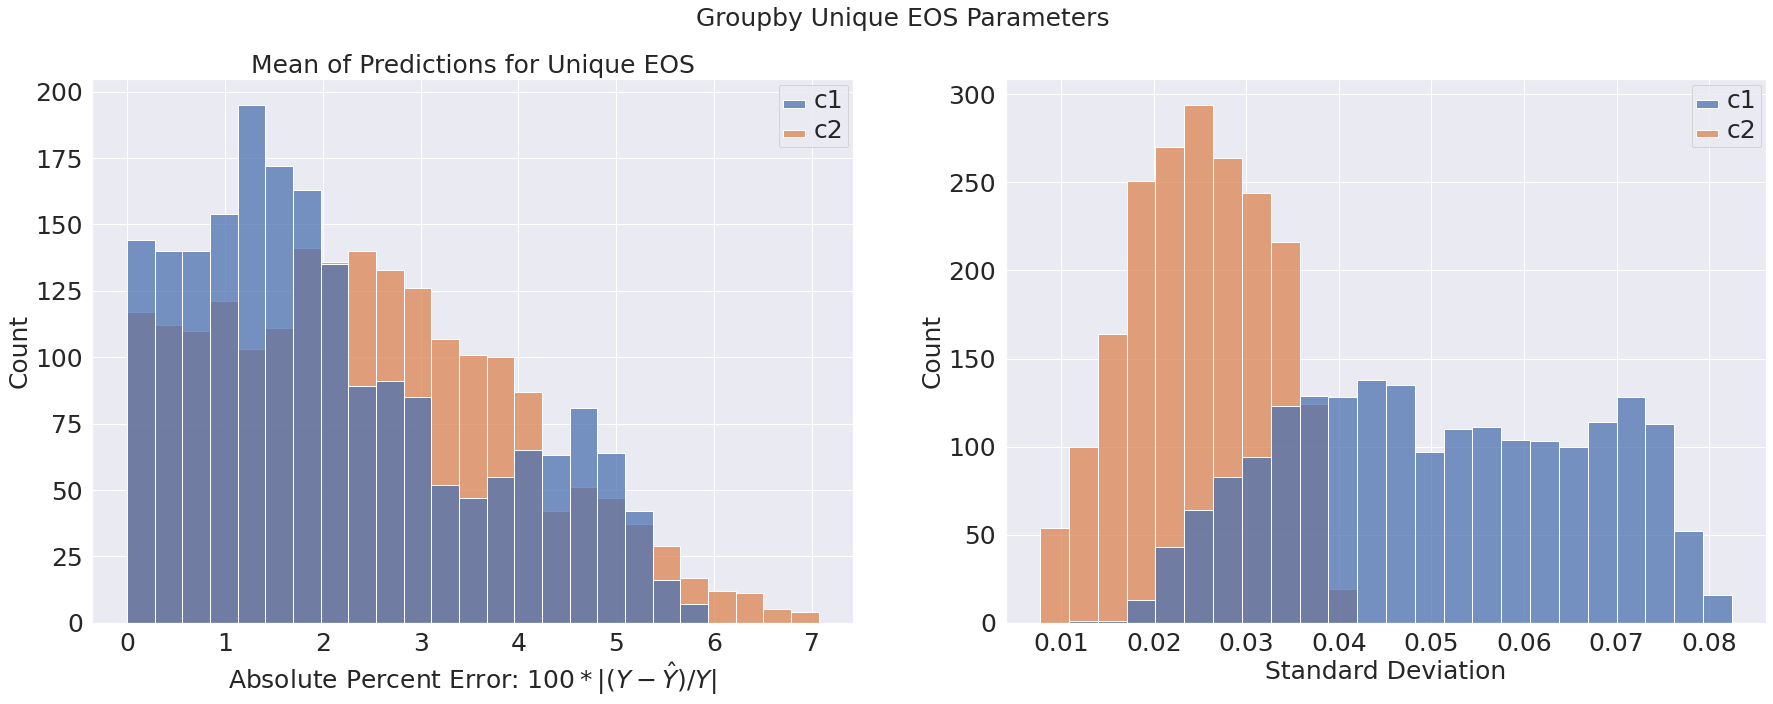

In [28]:
ns.analysis.groupby_unique_eos(cv_predictions, paradigm='spectra+star2eos')

### Poisson Noise

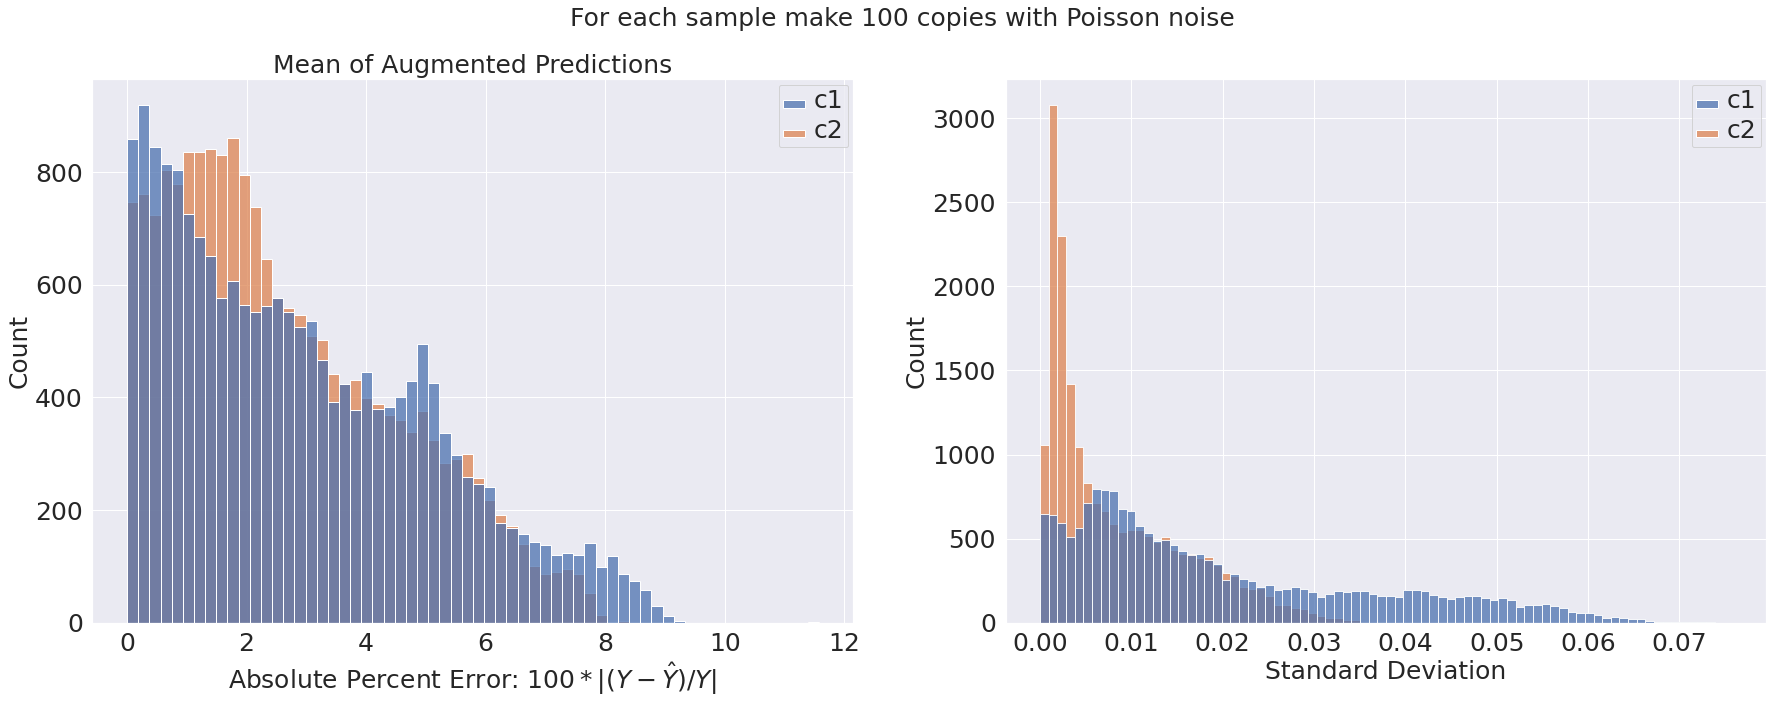

In [29]:
ns.analysis.groupby_poisson_noise('spectra+star2eos', trial=93)

# Spectra --> Star
---
### Training Results

In [28]:
hp_results_spectra2star = pd.read_csv('/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/results.csv')

### Prediction Analysis

In [29]:
hp_trial_erros = ns.analysis.calculate_hp_trial_errors(paradigm='spectra2star', num_files=500, targets=['nH', 'logTeff', 'dist'])

100%|██████████| 489/489 [01:54<00:00,  4.26it/s]


In [30]:
hp_trial_erros.sort_values(by='error').head(5)

error
86   17.174671
169  17.479213
411  17.624782
10   17.959996
186  18.184025

In [31]:
best_trial_id = int(hp_trial_erros.idxmin())

test_file = '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Predictions/validation_%05d_01.csv' % best_trial_id
df = pd.read_csv(test_file, index_col=0)[['nH', 'logTeff', 'dist', 'pred_nH', 'pred_logTeff', 'pred_dist']]
test_error, _ = ns.analysis.mse(df, ['nH', 'logTeff', 'dist'], ['pred_nH', 'pred_logTeff', 'pred_dist'])

print('Best trial:', best_trial_id, 'Val:', hp_trial_erros.loc[best_trial_id].values, 'Test:', test_error)

Best trial: 86 Val: [17.17467112] Test: 1.4177865440598947


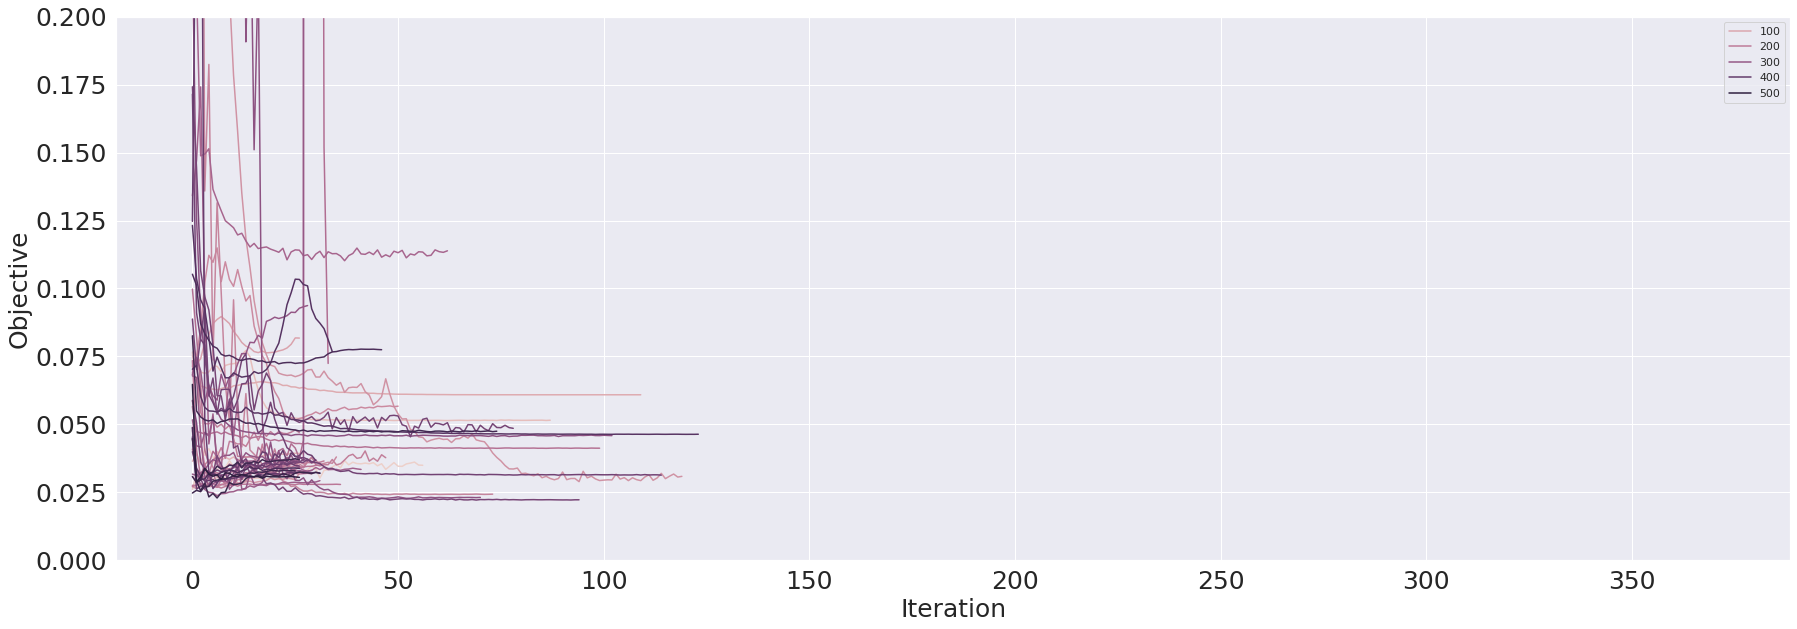

In [32]:
sns.lineplot(x='Iteration', y='Objective', data=hp_results_spectra2star, hue='Trial-ID'); plt.ylim(0, .2);
sns.lineplot(x='Iteration', y='Objective', data=hp_results_spectra2star[hp_results_spectra2star['Trial-ID'] == best_trial_id], lw=5);

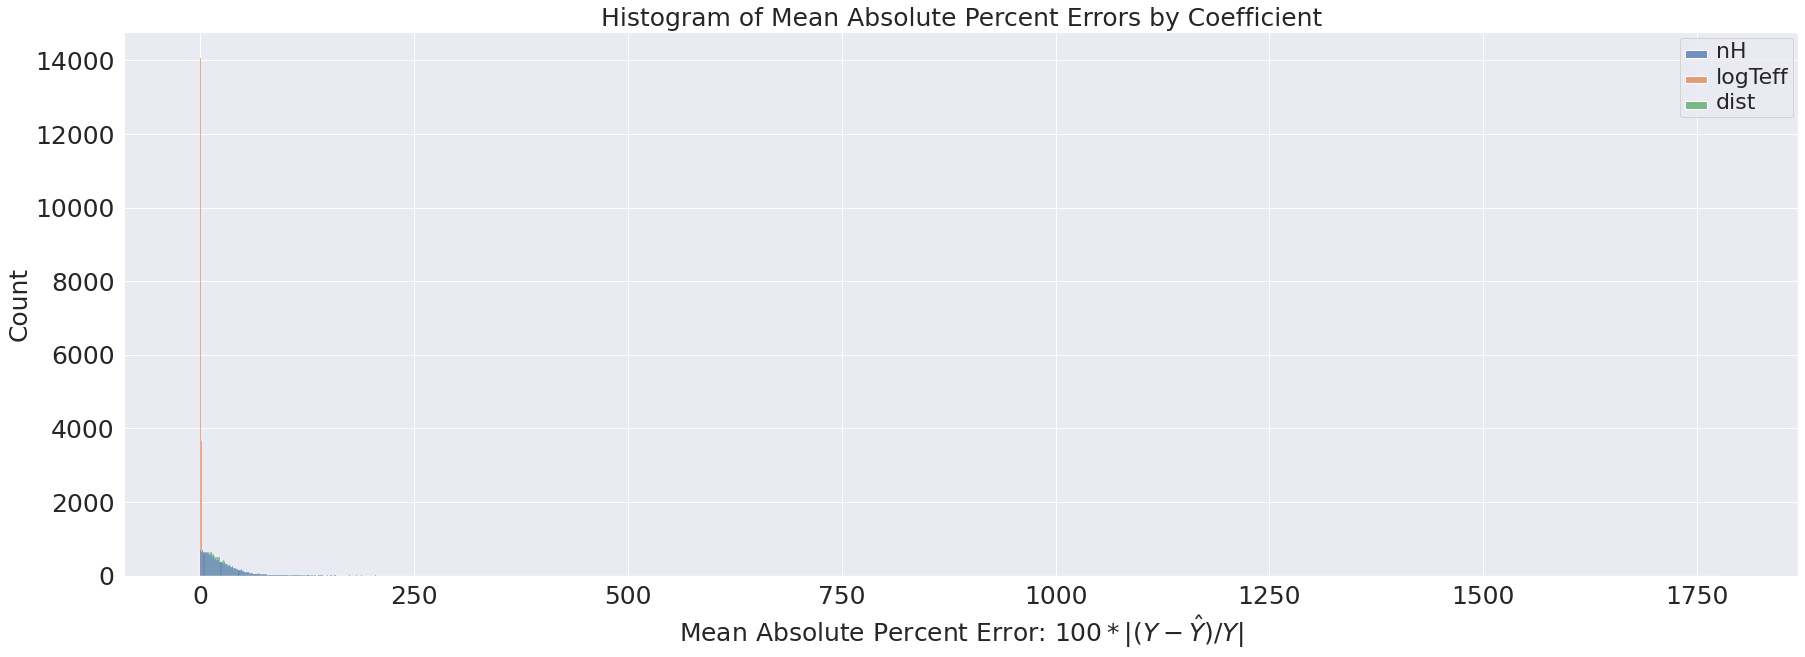

In [33]:
_, df_errors = ns.analysis.mape(df, ['nH', 'logTeff', 'dist'], ['pred_nH', 'pred_logTeff', 'pred_dist'])

ax = sns.histplot(data=df_errors.abs());
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.xlabel(r'Mean Absolute Percent Error: $100 * |(Y - \hat{Y}) / Y|$', fontsize=25);
plt.title('Histogram of Mean Absolute Percent Errors by Coefficient', fontsize=25);

In [34]:
args = {'load_settings_from' : '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Settings/%05d.json' % best_trial_id, 'run_type': ''}
ns.utils.load_settings(args)
args

{'load_settings_from': '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Settings/00086.json',
 'run_type': '',
 'activation': 'elu',
 'batch_norm': 1,
 'batch_size': 256,
 'dropout': 0.6402508548007683,
 'epochs': 500,
 'gpu': '0',
 'input_size': 250,
 'loss_function': 'mean_absolute_percentage_error',
 'lr': 0.003045568821522087,
 'lr_decay': 0.949164311722797,
 'model_dir': '/baldig/physicstest/NeutronStarsData/SherpaResults/spectra2star/Models/00086',
 'num_coefficients': 2,
 'num_folds': 1,
 'num_layers': 4,
 'num_nodes': 869,
 'output_dir': 'Results/',
 'output_size': 3,
 'paradigm': 'spectra2star',
 'patience': 25,
 'scaler_type': 'none2none',
 'sherpa': False,
 'skip_connections': 0,
 'trial_id': 86}